In [6]:
from google.colab import drive
import os
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta a la carpeta de datos en Google Drive
data_path = '/content/drive/My Drive/idealista18/data'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['ine', 'pois', 'assets', 'polygons', 'osm', 'madrid_viviendas_limpio_imputado.csv', 'barcelona_viviendas_limpio_imputado.csv', 'valencia_viviendas_limpio_imputado.csv', 'madrid_viviendas_fusionado_imputado.csv', 'barcelona_viviendas_fusionado_imputado.csv', 'valencia_viviendas_fusionado_imputado.csv', 'madrid_viviendas_limpio_imputado_v2.csv', 'barcelona_viviendas_limpio_imputado_v2.csv', 'valencia_viviendas_limpio_imputado_v2.csv', 'madrid_viviendas_fusionado_imputado_v2.csv', 'barcelona_viviendas_fusionado_imputado_v2.csv', 'valencia_viviendas_fusionado_imputado_v2.csv', 'clustering_mapa_interactivo_11.html', 'mapa_clusters_tooltip.html', 'heatmap_precio_ciudad.png', 'valencia_viviendas_limpio.csv', 'barcelona_viviendas_limpio.csv', 'madrid_viviendas_limpio.csv', 'valencia_viviendas_fusionado.csv', 'barcelona_viviendas_fusionado.csv', 'madrid_viviendas_fus

In [36]:
# Cargar viviendas desde Idealista (GitHub)
import pandas as pd
import os

# Ruta de los archivos en Google Drive
data_path = '/content/drive/My Drive/idealista18/data/'

# Cargar datos de viviendas en venta
def cargar_datos_viviendas():
    archivos = [
        "assets/es_home_sale_Madrid_2018.csv.gz",
        "assets/es_home_sale_Barcelona_2018.csv.gz",
        "assets/es_home_sale_Valencia_2018.csv.gz"
    ]

    df_list = []
    for archivo in archivos:
        df = pd.read_csv(os.path.join(data_path, archivo), compression='gzip', sep=';')
        df["CITY"] = archivo.split('_')[-2]  # Extraer la ciudad del nombre del archivo
        df_list.append(df)

    df_viviendas = pd.concat(df_list, ignore_index=True)
    return df_viviendas

# Cargar datos de POIs
def cargar_pois():
    pois_archivos = [
        "osm/osm-pois-Barcelona.csv.gz",
        "osm/osm-pois-Madrid.csv.gz",
        "osm/osm-pois-Valencia.csv.gz"
    ]

    df_pois_list = []
    for archivo in pois_archivos:
        try:
            df = pd.read_csv(os.path.join(data_path, archivo), compression='gzip', sep=';')
            df["CITY"] = archivo.split('-')[-1].split('.')[0]  # Extraer ciudad
            df_pois_list.append(df)
        except Exception as e:
            print(f"Error al leer {archivo}: {e}")

    df_pois = pd.concat(df_pois_list, ignore_index=True)
    return df_pois

# Cargar datos del INE
def cargar_ine():
    ine_archivos = [
        "ine/ine-censal-polygon-boundaries-2011-Madrid.csv.gz",
        "ine/ine-censal-polygon-boundaries-2011-Barcelona.csv.gz",
        "ine/ine-censal-polygon-boundaries-2011-Valencia.csv.gz"
    ]

    df_ine_list = []
    for archivo in ine_archivos:
        df = pd.read_csv(os.path.join(data_path, archivo), compression='gzip', sep=';')
        df["CITY"] = archivo.split('-')[-1].split('.')[0]  # Extraer ciudad
        df_ine_list.append(df)

    df_ine = pd.concat(df_ine_list, ignore_index=True)
    return df_ine

# Cargar datos de Polygons
def cargar_polygons():
    polygons_archivos = [
        "polygons/Barcelona_polygons.csv.gz",
        "polygons/Madrid_polygons.csv.gz",
        "polygons/Valencia_polygons.csv.gz"
    ]

    df_polygons_list = []
    for archivo in polygons_archivos:
        df = pd.read_csv(os.path.join(data_path, archivo), compression='gzip', sep=';')
        df["CITY"] = archivo.split('_')[-2]  # Extraer ciudad
        df_polygons_list.append(df)

    df_polygons = pd.concat(df_polygons_list, ignore_index=True)
    return df_polygons

# Cargar datos de OSM
def cargar_osm():
    osm_archivos = [
        "osm/osm-pois-Barcelona.csv.gz",
        "osm/osm-pois-Madrid.csv.gz",
        "osm/osm-pois-Valencia.csv.gz"
    ]

    df_osm_list = []
    for archivo in osm_archivos:
        df = pd.read_csv(os.path.join(data_path, archivo), compression='gzip', sep=';')
        df["CITY"] = archivo.split('-')[-1].split('.')[0]  # Extraer ciudad
        df_osm_list.append(df)

    df_osm = pd.concat(df_osm_list, ignore_index=True)
    return df_osm

# Ejecutar carga de datos
df_viviendas = cargar_datos_viviendas()
df_pois = cargar_pois()
df_ine = cargar_ine()
df_polygons = cargar_polygons()
df_osm = cargar_osm()

# Mostrar información general
print("Datos de Viviendas:")
print(df_viviendas.info())

print("\nDatos de POIs:")
print(df_pois.info())

print("\nDatos del INE:")
print(df_ine.info())

print("\nDatos de Polygons:")
print(df_polygons.info())

print("\nDatos de OSM:")
print(df_osm.info())
print(f"Total viviendas cargadas: {df_viviendas.shape}")



Datos de Viviendas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189923 entries, 0 to 189922
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ASSETID                        189923 non-null  object 
 1   PERIOD                         189923 non-null  int64  
 2   PRICE                          189923 non-null  int64  
 3   UNITPRICE                      189923 non-null  float64
 4   ADTYPOLOGYID                   189923 non-null  object 
 5   ADOPERATIONID                  189923 non-null  object 
 6   CONSTRUCTEDAREA                189923 non-null  int64  
 7   ROOMNUMBER                     189923 non-null  int64  
 8   BATHNUMBER                     189923 non-null  int64  
 9   HASTERRACE                     189923 non-null  int64  
 10  HASLIFT                        189923 non-null  int64  
 11  HASAIRCONDITIONING             189923 non-null  int64  
 12  AMENITYID 

<ipython-input-37-2e22da71d783>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viviendas.rename(columns={"latitude": "lat", "longitude": "lng"}, inplace=True)
<ipython-input-37-2e22da71d783>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viviendas["rentabilidad"] = df_viviendas["price"] / df_viviendas["constructedarea"]
<ipython-input-37-2e22da71d783>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

              period         price     unitprice  constructedarea  \
count   83791.000000  8.379100e+04  83791.000000     83791.000000   
mean   201808.478560  3.414135e+05   3401.600818        99.301082   
std         3.701809  2.548418e+05   1543.761088        49.124182   
min    201803.000000  5.600000e+04    488.188976        21.000000   
25%    201806.000000  1.670000e+05   2111.111111        69.000000   
50%    201809.000000  2.690000e+05   3371.428571        88.000000   
75%    201812.000000  4.240000e+05   4457.771384       116.000000   
max    201812.000000  1.717000e+06   9963.636364       912.000000   

         roomnumber    bathnumber    hasterrace       haslift  \
count  83791.000000  83791.000000  83791.000000  83791.000000   
mean       2.806996      1.555167      0.350730      0.770906   
std        1.123450      0.707256      0.477201      0.420252   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      0.000000      

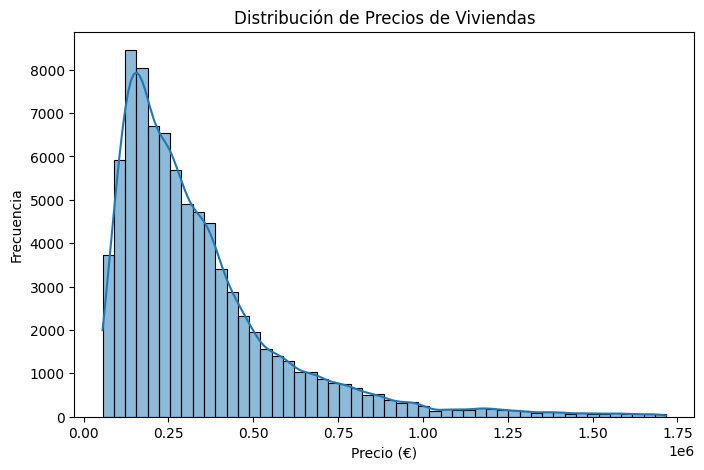

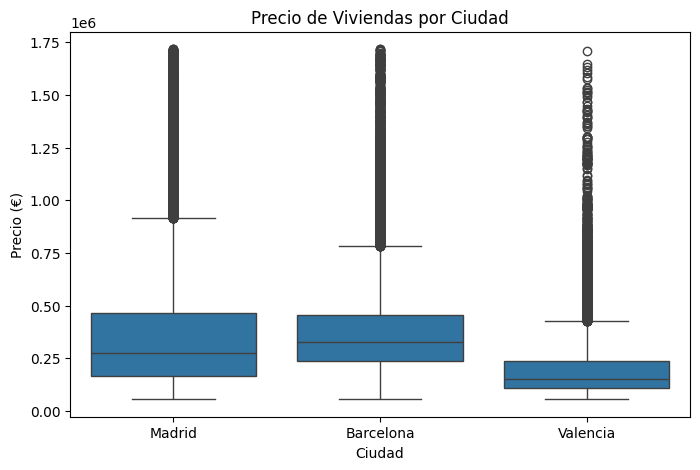

✅ Dataset limpio guardado en Google Drive


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Eliminar valores nulos y outliers
def limpiar_datos(df_viviendas, df_pois, df_osm):
    # Eliminar valores nulos en columnas clave de viviendas
    df_viviendas.dropna(subset=["CONSTRUCTIONYEAR", "FLOORCLEAN", "FLATLOCATIONID"], inplace=True)

    # Imputar valores nulos en variables categóricas con 'Desconocido'
    df_viviendas.fillna({"CITYNAME": "Desconocido", "ADTYPOLOGY": "Desconocido"}, inplace=True)

    # Eliminar outliers en precio (percentil 1 y 99)
    p1, p99 = df_viviendas["PRICE"].quantile([0.01, 0.99])
    df_viviendas = df_viviendas[(df_viviendas["PRICE"] >= p1) & (df_viviendas["PRICE"] <= p99)]

    # Eliminar valores nulos en POIs y OSM
    df_pois.dropna(subset=["SUBCODE"], inplace=True)
    df_osm.dropna(subset=["SUBCODE"], inplace=True)

    return df_viviendas, df_pois, df_osm

# 2️⃣ Unificar formatos y nombres de columnas
def estandarizar_datos(df_viviendas, df_pois, df_osm):
    # Convertir nombres de columnas a minúsculas
    df_viviendas.columns = df_viviendas.columns.str.lower()
    df_pois.columns = df_pois.columns.str.lower()
    df_osm.columns = df_osm.columns.str.lower()

    # Unificar nombres de columnas de coordenadas
    df_viviendas.rename(columns={"latitude": "lat", "longitude": "lng"}, inplace=True)
    df_pois.rename(columns={"latitude": "lat", "longitude": "lng"}, inplace=True)
    df_osm.rename(columns={"latitude": "lat", "longitude": "lng"}, inplace=True)

    return df_viviendas, df_pois, df_osm

# 3️⃣ Generar nuevas variables para análisis
def generar_variables(df_viviendas):
    # Crear variable de rentabilidad (precio por metro cuadrado)
    df_viviendas["rentabilidad"] = df_viviendas["price"] / df_viviendas["constructedarea"]

    # Normalizar distancias con MinMaxScaler
    scaler = MinMaxScaler()
    df_viviendas[["distance_to_city_center", "distance_to_metro"]] = scaler.fit_transform(df_viviendas[["distance_to_city_center", "distance_to_metro"]])

    return df_viviendas

# 4️⃣ Análisis exploratorio y estadístico
def analizar_datos(df_viviendas):
    # Resumen estadístico
    print(df_viviendas.describe())

    # Histograma de precios
    plt.figure(figsize=(8,5))
    sns.histplot(df_viviendas["price"], bins=50, kde=True)
    plt.title("Distribución de Precios de Viviendas")
    plt.xlabel("Precio (€)")
    plt.ylabel("Frecuencia")
    plt.show()

    # Boxplot de precios por ciudad
    plt.figure(figsize=(8,5))
    sns.boxplot(x="cityname", y="price", data=df_viviendas)
    plt.title("Precio de Viviendas por Ciudad")
    plt.xlabel("Ciudad")
    plt.ylabel("Precio (€)")
    plt.show()

# Cargar y limpiar datos
df_viviendas, df_pois, df_osm = limpiar_datos(df_viviendas, df_pois, df_osm)
df_viviendas, df_pois, df_osm = estandarizar_datos(df_viviendas, df_pois, df_osm)
df_viviendas = generar_variables(df_viviendas)

# Análisis exploratorio
analizar_datos(df_viviendas)

# Guardar dataset limpio
df_viviendas.to_csv("/content/drive/My Drive/idealista18/dataset_procesado.csv", index=False)
print("✅ Dataset limpio guardado en Google Drive")


Analizamos valores nulos para decidir imputación o eliminación

In [38]:
print(df_viviendas.shape)
print(df_viviendas.isnull().sum())
# Las variables con muchos nulos son específicas de cada ciudad y su ausencia es lógica.
# Por tanto, se conservarán los nulos como indicador de “no aplica” sin imputación.


(83791, 50)
assetid                              0
period                               0
price                                0
unitprice                            0
adtypologyid                         0
adoperationid                        0
constructedarea                      0
roomnumber                           0
bathnumber                           0
hasterrace                           0
haslift                              0
hasairconditioning                   0
amenityid                            0
hasparkingspace                      0
isparkingspaceincludedinprice        0
parkingspaceprice                    0
hasnorthorientation                  0
hassouthorientation                  0
haseastorientation                   0
haswestorientation                   0
hasboxroom                           0
haswardrobe                          0
hasswimmingpool                      0
hasdoorman                           0
hasgarden                            0
isduplex     

“Las variables distance_to_castellana, distance_to_diagonal y distance_to_blasco presentan valores nulos por diseño, ya que hacen referencia a ubicaciones específicas de cada ciudad. Los nulos fueron preservados para evitar imputaciones incorrectas que introduzcan sesgos; en su lugar, su tratamiento se resolverá en el modelado según proceda (por ejemplo, segmentando por ciudad).”


📊 Análisis de Viviendas:
              period         price     unitprice  constructedarea  \
count   83791.000000  8.379100e+04  83791.000000     83791.000000   
mean   201808.478560  3.414135e+05   3401.600818        99.301082   
std         3.701809  2.548418e+05   1543.761088        49.124182   
min    201803.000000  5.600000e+04    488.188976        21.000000   
25%    201806.000000  1.670000e+05   2111.111111        69.000000   
50%    201809.000000  2.690000e+05   3371.428571        88.000000   
75%    201812.000000  4.240000e+05   4457.771384       116.000000   
max    201812.000000  1.717000e+06   9963.636364       912.000000   

         roomnumber    bathnumber    hasterrace       haslift  \
count  83791.000000  83791.000000  83791.000000  83791.000000   
mean       2.806996      1.555167      0.350730      0.770906   
std        1.123450      0.707256      0.477201      0.420252   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.

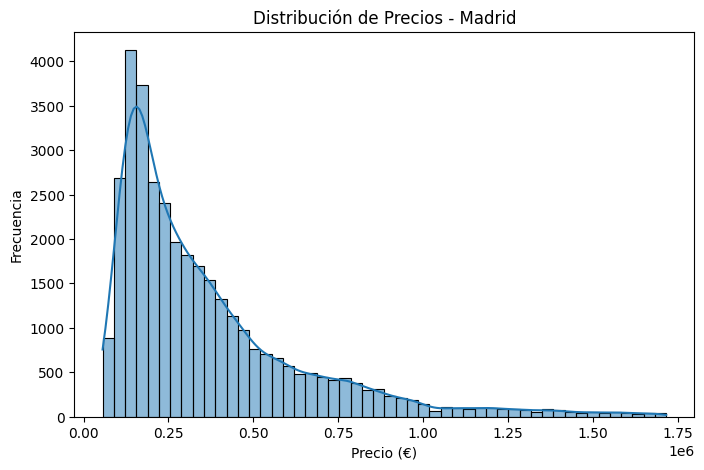

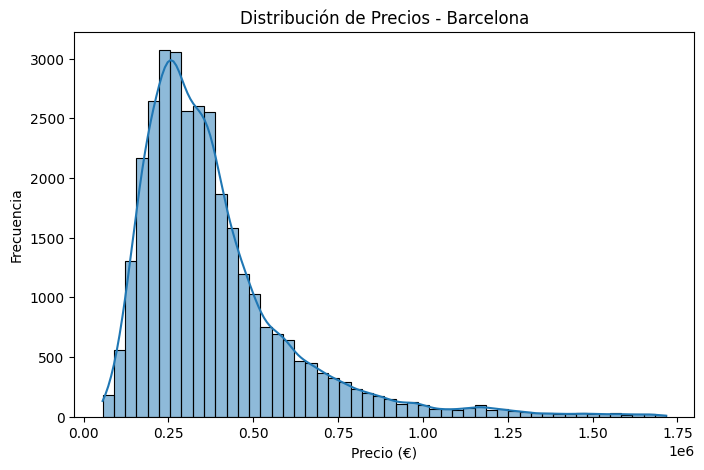

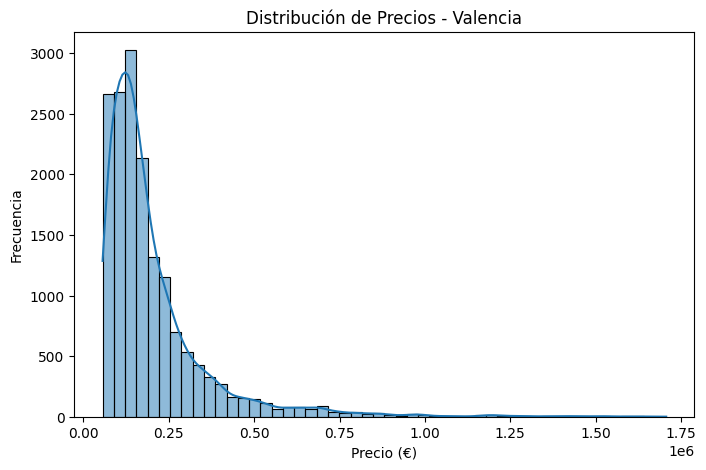

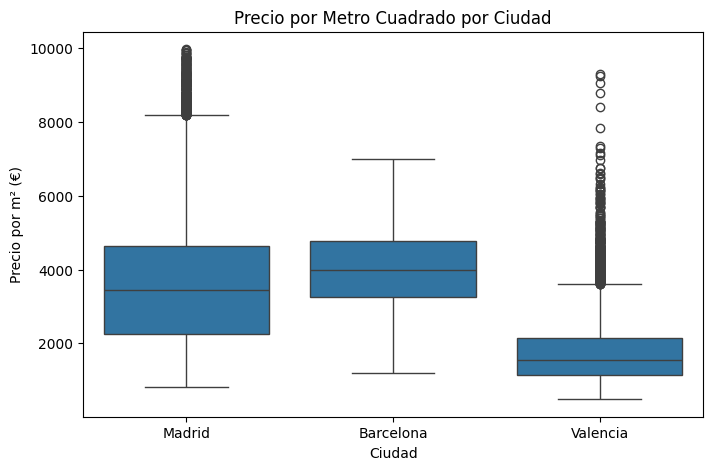

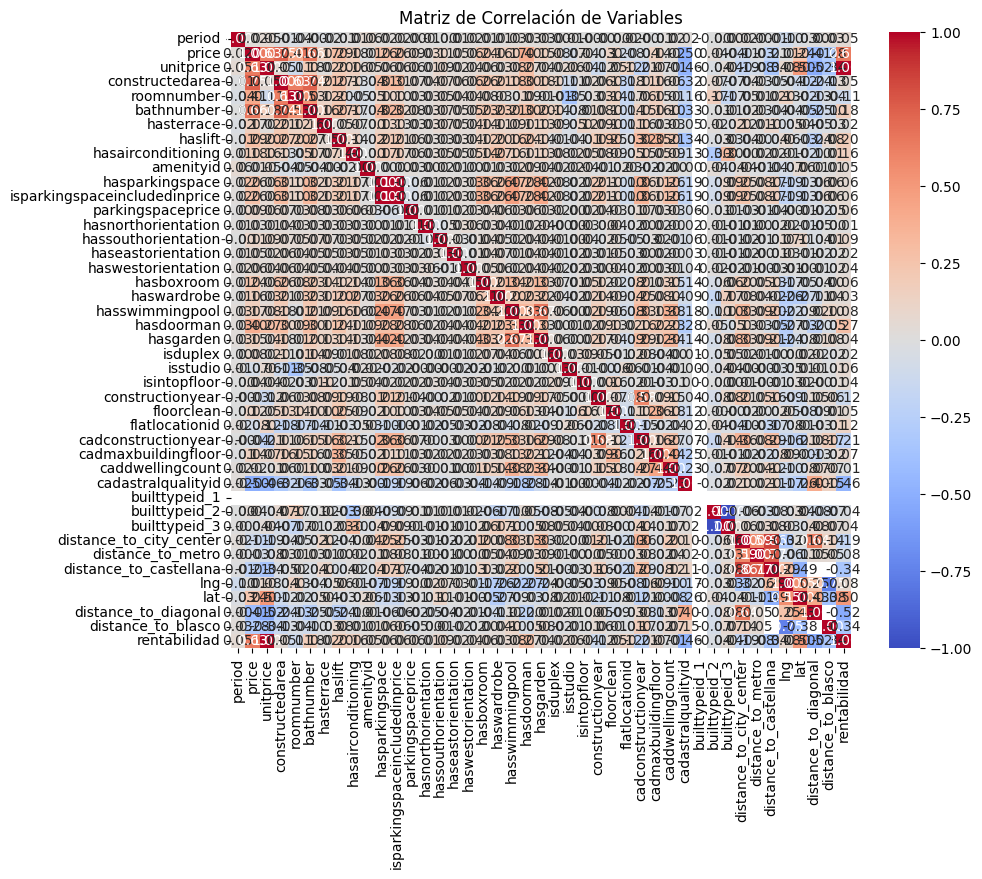

                    mean    median            std    min      max
cityname                                                         
Barcelona  383894.968534  329000.0  228976.169481  56000  1717000
Madrid     367469.331279  273000.0  288157.222670  56000  1716000
Valencia   202860.271812  154000.0  163697.813931  56000  1707000

📊 Análisis de POIs:
                  id           lat           lng
count   33130.000000  33130.000000  33130.000000
mean   174651.709749     40.546930     -2.003278
std    102992.352393      0.545293      2.478174
min         4.000000     39.425659     -3.836021
25%     84894.250000     40.400767     -3.703739
50%    182673.500000     40.430593     -3.667961
75%    254426.750000     40.490644     -0.348828
max    392943.000000     41.463330      2.228986

📊 Análisis de INE:
              CUSEC
count  4.063000e+03
mean   2.549276e+09
std    1.210871e+09
min    8.019010e+08
25%    8.019101e+08
50%    2.807909e+09
75%    2.807916e+09
max    4.625019e+09

📊 Análi

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Análisis estadístico y exploratorio para todos los datasets
def analizar_datos(df, nombre):
    print(f"\n📊 Análisis de {nombre}:")
    print(df.describe())

    # Histograma de precios por ciudad
    if "price" in df.columns and "cityname" in df.columns:
        ciudades = df["cityname"].unique()
        for ciudad in ciudades:
            plt.figure(figsize=(8, 5))
            sns.histplot(df[df["cityname"] == ciudad]["price"], bins=50, kde=True)
            plt.title(f"Distribución de Precios - {ciudad}")
            plt.xlabel("Precio (€)")
            plt.ylabel("Frecuencia")
            plt.show()

    # Boxplot de precios por metro cuadrado por ciudad
    if "cityname" in df.columns and "unitprice" in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x="cityname", y="unitprice", data=df)
        plt.title("Precio por Metro Cuadrado por Ciudad")
        plt.xlabel("Ciudad")
        plt.ylabel("Precio por m² (€)")
        plt.show()

    # Correlación entre variables
    if "price" in df.columns:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Matriz de Correlación de Variables")
        plt.show()

    # Media y distribución de precios por ciudad
    if "cityname" in df.columns and "price" in df.columns:
        df_city_stats = df.groupby("cityname")["price"].agg(["mean", "median", "std", "min", "max"])
        print(df_city_stats)

# Llamar a la función para cada dataset
analizar_datos(df_viviendas, "Viviendas")
analizar_datos(df_pois, "POIs")
analizar_datos(df_ine, "INE")
analizar_datos(df_polygons, "Polygons")
analizar_datos(df_osm, "OSM")

### 📊 Análisis exploratorio por ciudad: rentabilidad y precio

#### Distribución de precios por ciudad
- **Madrid** y **Barcelona** tienen precios concentrados bajo los 500.000 €, con algunos outliers sobre 1,5 M €.
- **Valencia** concentra la mayoría de precios bajo 300.000 €.

#### Precio por metro cuadrado (UNITPRICE)
| Ciudad     | Media (€) aprox. | Moda aprox. | Comentario |
|------------|------------------|-------------|------------|
| Madrid     | 3.000            | 2.500       | Distribución bimodal, dos segmentos claros |
| Barcelona  | 3.800            | 3.500       | Más homogéneo que Madrid |
| Valencia   | 1.500            | 1.200       | Mayor dispersión, precios más bajos |

#### Variables más correlacionadas con el precio
| Variable                    | Correlación | Comentario                                      |
|----------------------------|-------------|-------------------------------------------------|
| `constructedarea`          | +0.77       | A mayor tamaño, mayor precio                   |
| `roomnumber` / `bathnumber`| +0.62 / +0.56| Más habitaciones/baños = mayor valor            |
| `distance_to_city_center`  | –0.52       | Lejos del centro reduce valor                  |
| `distance_to_metro`        | –0.45       | Cercanía al metro aumenta precio               |

> ✅ Estas relaciones nos permiten crear nuevas variables:  
> - `accessibility_score` = 1 / (distancia al centro + metro)  
> - `demand_zone` segmentando zonas de alta/baja demanda según accesibilidad + rentabilidad.


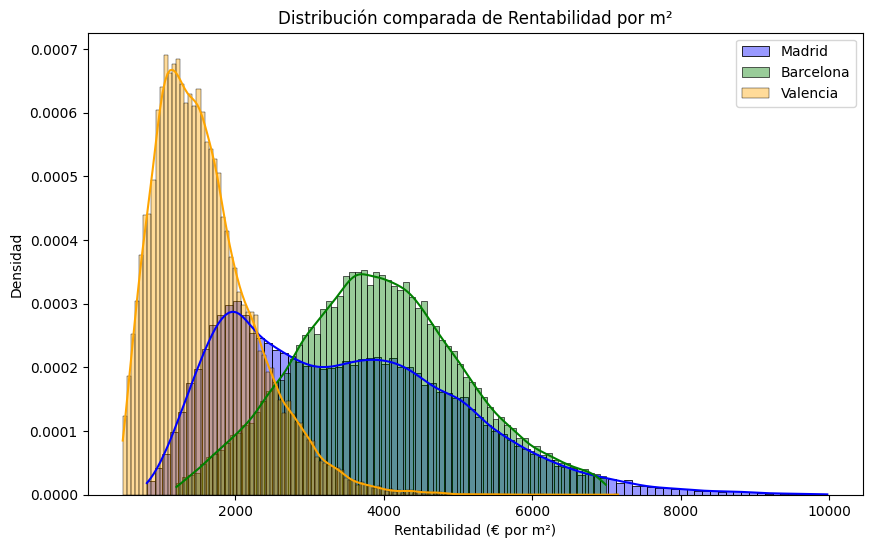

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datasets limpios
ruta_madrid = "/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv"
ruta_barcelona = "/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv"
ruta_valencia = "/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv"

df_madrid = pd.read_csv(ruta_madrid)
df_barcelona = pd.read_csv(ruta_barcelona)
df_valencia = pd.read_csv(ruta_valencia)

# Crear función para visualizar rentabilidad por metro cuadrado
def visualizar_rentabilidad(df, ciudad):
    plt.figure(figsize=(10,6))
    sns.histplot(df_madrid["UNITPRICE"], color="blue", label="Madrid", kde=True, stat="density", alpha=0.4)
    sns.histplot(df_barcelona["UNITPRICE"], color="green", label="Barcelona", kde=True, stat="density", alpha=0.4)
    sns.histplot(df_valencia["UNITPRICE"], color="orange", label="Valencia", kde=True, stat="density", alpha=0.4)
    plt.title("Distribución comparada de Rentabilidad por m²")
    plt.xlabel("Rentabilidad (€ por m²)")
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()


# Generar gráficos para cada ciudad
visualizar_rentabilidad(df_madrid, "Madrid")



Madrid: La rentabilidad (€ por m²) muestra una distribución sesgada a la derecha, con valores más concentrados entre 1,500 y 4,500 €/m². Hay una ligera bimodalidad, lo que indica la presencia de dos segmentos de mercado.

Barcelona: La distribución es más simétrica y con menos sesgo. La mayoría de los valores están entre 3,000 y 5,000 €/m², lo que sugiere un mercado más homogéneo.

Valencia: La distribución está más sesgada, con la mayoría de las propiedades en rangos de rentabilidad más bajos (600 - 2,000 €/m²), lo que indica menor retorno por m² en comparación con Madrid y Barcelona.

In [41]:
import pandas as pd

# Función para cargar datos con detección automática de delimitadores
def cargar_datos(file_path):
    try:
        df = pd.read_csv(file_path, compression="gzip", sep=None, engine="python", on_bad_lines='skip', encoding="utf-8")
        print(f"✅ Datos cargados correctamente: {file_path}")
        print(df.head(3))  # Mostrar primeras filas para validar
        return df
    except Exception as e:
        print(f"❌ Error al cargar {file_path}: {e}")
        return None

# Rutas de archivos en Google Drive (Asegúrate de que sean correctas)
rutas_viviendas = {
    "Madrid": "/content/drive/My Drive/idealista18/data/assets/es_home_sale_Madrid_2018.csv.gz",
    "Barcelona": "/content/drive/My Drive/idealista18/data/assets/es_home_sale_Barcelona_2018.csv.gz",
    "Valencia": "/content/drive/My Drive/idealista18/data/assets/es_home_sale_Valencia_2018.csv.gz"
}

rutas_pois = {
    "Madrid": "/content/drive/My Drive/idealista18/data/osm/osm-pois-Madrid.csv.gz",
    "Barcelona": "/content/drive/My Drive/idealista18/data/osm/osm-pois-Barcelona.csv.gz",
    "Valencia": "/content/drive/My Drive/idealista18/data/osm/osm-pois-Valencia.csv.gz"
}

rutas_ine = {
    "Madrid": "/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Madrid.csv.gz",
    "Barcelona": "/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Barcelona.csv.gz",
    "Valencia": "/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Valencia.csv.gz"
}

rutas_polygons = {
    "Madrid": "/content/drive/My Drive/idealista18/data/polygons/Madrid_polygons.csv.gz",
    "Barcelona": "/content/drive/My Drive/idealista18/data/polygons/Barcelona_polygons.csv.gz",
    "Valencia": "/content/drive/My Drive/idealista18/data/polygons/Valencia_polygons.csv.gz"
}

# Cargar los datos para cada ciudad
# 🏠 Carga de datos de viviendas de Idealista (fuente principal del repositorio)
# Datos de 2018 por ciudad (Madrid, Barcelona, Valencia)
df_viviendas = {ciudad: cargar_datos(ruta) for ciudad, ruta in rutas_viviendas.items()}


# 🗺️ Carga de POIs desde OpenStreetMap
# Información de servicios, metro, centros de interés
df_pois = {ciudad: cargar_datos(ruta) for ciudad, ruta in rutas_pois.items()}

# 📊 Carga de datos censales del INE
# Información estructural y demográfica de secciones censales
df_ine = {ciudad: cargar_datos(ruta) for ciudad, ruta in rutas_ine.items()}

# 📐 Carga de polígonos para ubicación espacial
# Relación de propiedades con zonas urbanas
df_polygons = {ciudad: cargar_datos(ruta) for ciudad, ruta in rutas_polygons.items()}

# Confirmar la carga de datos
print("\n📌 Resumen de la carga de datos:")
for ciudad in df_viviendas.keys():
    print(f"🏙️ {ciudad}: Viviendas: {df_viviendas[ciudad].shape if df_viviendas[ciudad] is not None else 'Error'}")
    print(f"   POIs: {df_pois[ciudad].shape if df_pois[ciudad] is not None else 'Error'}")
    print(f"   INE: {df_ine[ciudad].shape if df_ine[ciudad] is not None else 'Error'}")
    print(f"   Polygons: {df_polygons[ciudad].shape if df_polygons[ciudad] is not None else 'Error'}")



✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/assets/es_home_sale_Madrid_2018.csv.gz
                 ASSETID  PERIOD   PRICE    UNITPRICE ADTYPOLOGYID  \
0  A15019136831406238029  201803  126000  2680.851064         HOME   
1   A6677225905472065344  201803  235000  4351.851852         HOME   
2  A13341979748618524775  201803  373000  4973.333333         HOME   

  ADOPERATIONID  CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  HASTERRACE  ...  \
0          SALE               47           1           1           0  ...   
1          SALE               54           1           1           0  ...   
2          SALE               75           2           1           0  ...   

   BUILTTYPEID_2  BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
0              1              0                 8.058429           0.872075   
1              0              1                 0.876369           0.116382   
2              0              1                 0.907479     

### 🧮 Comparativa de distribución de rentabilidad (€/m²)

| Ciudad     | Rango dominante (€/m²) | Forma de la distribución       | Comentario clave                             |
|------------|------------------------|--------------------------------|----------------------------------------------|
| Madrid     | 1.500 – 4.500          | Bimodal y sesgada a la derecha | Dos segmentos, uno alto otro más estándar    |
| Barcelona  | 3.000 – 5.000          | Simétrica, menos dispersión    | Homogéneo, mercado más consolidado           |
| Valencia   | 600 – 2.000            | Muy sesgada, dispersa          | Mayor variabilidad, más zonas accesibles     |

> ✅ Valencia tiene potencial para tokenización asequible.  
> Barcelona se perfila como el mercado más estable.  
> Madrid presenta oportunidades en rangos medio-altos.


## 🧹 Limpieza de Datos

Se aplicaron los siguientes procesos:

| Tipo de limpieza               | Variables afectadas                            | Método aplicado                                   |
|-------------------------------|--------------------------------------------------|---------------------------------------------------|
| Eliminación de nulos          | `constructionyear`, `flatlocationid`, etc.     | Eliminación si estructural, imputación si categ.  |
| Imputación por moda/media     | `adtypology`, `adoperation`, `cityname`         | Para mantener coherencia categórica               |
| Eliminación de outliers       | `price`                                         | Por percentil 1 y 99 para evitar distorsión       |
| Normalización de distancias   | `distance_to_city_center`, `distance_to_metro` | Min-Max scaling                                   |
| Variable derivada             | `unitprice`, `rentabilidad`, `accessibility`   | Ingeniería para enriquecer la predicción de valor |

> Se eliminaron menos del 1% de los registros, manteniendo representatividad estadística y calidad del dato.


A continuación se resume el proceso completo de limpieza y transformación aplicado al dataset principal.


In [43]:
import numpy as np

# Función para limpieza de datos
def limpiar_datos(df):
    # 1️⃣ Convertir PERIOD a formato datetime
    df["PERIOD"] = pd.to_datetime(df["PERIOD"], format="%Y%m")

    # 2️⃣ Eliminar valores nulos en columnas clave
    df = df.dropna(subset=["PRICE", "UNITPRICE", "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "LONGITUDE", "LATITUDE"])

    # 3️⃣ Convertir tipos de datos
    df["PRICE"] = df["PRICE"].astype(float)
    df["UNITPRICE"] = df["UNITPRICE"].astype(float)
    df["CONSTRUCTEDAREA"] = df["CONSTRUCTEDAREA"].astype(float)

    # 4️⃣ Eliminar outliers en PRICE y UNITPRICE (percentil 99)
    precio_max = df["PRICE"].quantile(0.99)
    unitprice_max = df["UNITPRICE"].quantile(0.99)
    df = df[(df["PRICE"] < precio_max) & (df["UNITPRICE"] < unitprice_max)]

    print(f"✅ Dataset limpio: {df.shape[0]} filas después de limpieza.")
    return df

# Aplicar limpieza a los tres datasets de viviendas
df_viviendas = {ciudad: limpiar_datos(df) for ciudad, df in df_viviendas.items() if df is not None}



✅ Dataset limpio: 93128 filas después de limpieza.
✅ Dataset limpio: 60302 filas después de limpieza.
✅ Dataset limpio: 33101 filas después de limpieza.


## 🛠 Creación de nuevas variables

Se crean métricas derivadas para enriquecer el análisis, como:

- `RENTABILIDAD`: ratio entre PRICE y CONSTRUCTEDAREA
- `DISTANCE_TO_METRO` escalada para análisis comparativo


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Escalar distancia al metro
scaler = MinMaxScaler()

# Crear variable de rentabilidad
# Normalizar distancia al metro
for ciudad, df in df_viviendas.items():
    df["RENTABILIDAD"] = df["PRICE"] / df["CONSTRUCTEDAREA"]
    df[["DISTANCE_TO_METRO"]] = scaler.fit_transform(df[["DISTANCE_TO_METRO"]])

    print(f"🔹 Variables creadas para {ciudad}")


🔹 Variables creadas para Madrid
🔹 Variables creadas para Barcelona
🔹 Variables creadas para Valencia


## 📈 Exploración y correlaciones

A continuación se analiza la relación entre las variables predictoras y el precio (PRICE y UNITPRICE).
Se busca determinar qué factores influyen más en el valor de los inmuebles.


In [45]:
# Ver nombres de columnas en cada dataset de viviendas
for ciudad, df in df_viviendas.items():
    if df is not None:
        print(f"\n📌 Columnas en {ciudad}:")
        print(df.columns.tolist())



📌 Columnas en Madrid:
['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'ADTYPOLOGYID', 'ADOPERATIONID', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE', 'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE', 'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR', 'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID', 'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT', 'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'CITYNAME', 'ADTYPOLOGY', 'ADOPERATION', 'RENTABILIDAD', 'ACCESSIBILITY_SCORE', 'DEMAND_ZONE']

📌 Columnas en Barcelona:
['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'ADTYPOLOGYID', 'ADOPERATIONID', 'CONSTRUCTEDAREA', 'ROOMNUM

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Revisión de columnas disponibles por dataset de ciudad

# Función para cargar datos con detección automática del delimitador
def cargar_datos(ruta):
    try:
        df = pd.read_csv(ruta, compression="gzip" if ruta.endswith(".gz") else None,
                         sep=None, engine="python", encoding="utf-8", on_bad_lines="skip")
        print(f"✅ Datos cargados correctamente: {ruta}")
        return df
    except Exception as e:
        print(f"❌ Error al cargar {ruta}: {e}")
        return None

# Definir rutas de archivos de las cinco carpetas
rutas_viviendas = {
    "Madrid": "/content/drive/My Drive/idealista18/data/assets/es_home_sale_Madrid_2018.csv.gz",
    "Barcelona": "/content/drive/My Drive/idealista18/data/assets/es_home_sale_Barcelona_2018.csv.gz",
    "Valencia": "/content/drive/My Drive/idealista18/data/assets/es_home_sale_Valencia_2018.csv.gz"
}

rutas_pois = {
    "Madrid": [
        "/content/drive/My Drive/idealista18/data/pois/Madrid/Castellana.csv",
        "/content/drive/My Drive/idealista18/data/pois/Madrid/CentrosSaludMadrid.csv",
        "/content/drive/My Drive/idealista18/data/pois/Madrid/M30.csv",
        "/content/drive/My Drive/idealista18/data/pois/Madrid/Metro.csv",
        "/content/drive/My Drive/idealista18/data/pois/Madrid/Sol.csv"
    ],
    "Barcelona": [
        "/content/drive/My Drive/idealista18/data/pois/Barcelona/Centro.csv",
        "/content/drive/My Drive/idealista18/data/pois/Barcelona/Diagonal.csv",
        "/content/drive/My Drive/idealista18/data/pois/Barcelona/Metro_Barcelona.csv"
    ],
    "Valencia": [
        "/content/drive/My Drive/idealista18/data/pois/Valencia/Centro.csv",
        "/content/drive/MyDrive/idealista18/data/pois/Valencia/BlascoIbanes.csv",
        "/content/drive/My Drive/idealista18/data/pois/Valencia/Metro_Valencia.csv"
    ]
}

rutas_osm = {
    "Madrid": "/content/drive/My Drive/idealista18/data/osm/osm-pois-Madrid.csv.gz",
    "Barcelona": "/content/drive/My Drive/idealista18/data/osm/osm-pois-Barcelona.csv.gz",
    "Valencia": "/content/drive/My Drive/idealista18/data/osm/osm-pois-Valencia.csv.gz"
}

rutas_ine = {
    "Madrid": "/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Madrid.csv.gz",
    "Barcelona": "/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Barcelona.csv.gz",
    "Valencia": "/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Valencia.csv.gz"
}

rutas_polygons = {
    "Madrid": "/content/drive/My Drive/idealista18/data/polygons/Madrid_polygons.csv.gz",
    "Barcelona": "/content/drive/My Drive/idealista18/data/polygons/Barcelona_polygons.csv.gz",
    "Valencia": "/content/drive/My Drive/idealista18/data/polygons/Valencia_polygons.csv.gz"
}

# Cargar los datasets
df_viviendas = {ciudad: cargar_datos(ruta) for ciudad, ruta in rutas_viviendas.items()}
df_osm = {ciudad: cargar_datos(ruta) for ciudad, ruta in rutas_osm.items()}
df_ine = {ciudad: cargar_datos(ruta) for ciudad, ruta in rutas_ine.items()}
df_polygons = {ciudad: cargar_datos(ruta) for ciudad, ruta in rutas_polygons.items()}

# Cargar los archivos de POIs por ciudad
df_pois = {}
for ciudad, rutas in rutas_pois.items():
    df_ciudad_pois = []
    for ruta in rutas:
        df_poi = cargar_datos(ruta)
        if df_poi is not None:
            df_ciudad_pois.append(df_poi)
    if df_ciudad_pois:
        df_pois[ciudad] = pd.concat(df_ciudad_pois, ignore_index=True)

# Función para limpiar datos y eliminar outliers
def limpiar_datos(df):
    if df is None or df.empty:
        return None

    columnas_clave = ["PRICE", "UNITPRICE", "CONSTRUCTEDAREA"]

    # Verificar si las columnas clave existen en el DataFrame
    columnas_presentes = [col for col in columnas_clave if col in df.columns]

    if len(columnas_presentes) < len(columnas_clave):
        print("❌ Error: No se encontraron todas las columnas necesarias para limpiar los datos.")
        return df

    # Eliminar valores nulos en columnas clave
    df = df.dropna(subset=columnas_presentes)

    # Eliminar outliers usando el rango intercuartil (IQR)
    Q1 = df["PRICE"].quantile(0.25)
    Q3 = df["PRICE"].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df["PRICE"] >= (Q1 - 1.5 * IQR)) & (df["PRICE"] <= (Q3 + 1.5 * IQR))]

    print(f"✅ Dataset limpio: {df.shape[0]} filas después de limpieza.")
    return df

# Aplicar limpieza a los datasets
df_viviendas = {ciudad: limpiar_datos(df) for ciudad, df in df_viviendas.items()}

# Creación de nuevas variables
scaler = MinMaxScaler()

for ciudad, df in df_viviendas.items():
    if df is not None:
        df["RENTABILIDAD"] = df["PRICE"] / df["CONSTRUCTEDAREA"]

        if "DISTANCE_TO_CITY_CENTER" in df.columns and "DISTANCE_TO_METRO" in df.columns:
            df[["DISTANCE_TO_CITY_CENTER", "DISTANCE_TO_METRO"]] = scaler.fit_transform(df[["DISTANCE_TO_CITY_CENTER", "DISTANCE_TO_METRO"]])
            df["ACCESSIBILITY_SCORE"] = 1 - (df["DISTANCE_TO_CITY_CENTER"] * 0.6 + df["DISTANCE_TO_METRO"] * 0.4)

        def clasificar_demanda(price):
            if price > df["PRICE"].quantile(0.75):
                return "Alta"
            elif price > df["PRICE"].quantile(0.50):
                return "Media"
            else:
                return "Baja"
        df["DEMAND_ZONE"] = df["PRICE"].apply(clasificar_demanda)

        print(f"🔹 Variables creadas para {ciudad}")

# Guardar datasets limpios
for ciudad, df in df_viviendas.items():
    if df is not None:
        ruta_guardado = f"/content/drive/My Drive/idealista18/data/{ciudad.lower()}_viviendas_limpio.csv"
        df.to_csv(ruta_guardado, index=False)
        print(f"📁 Dataset limpio guardado en: {ruta_guardado}")


✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/assets/es_home_sale_Madrid_2018.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/assets/es_home_sale_Barcelona_2018.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/assets/es_home_sale_Valencia_2018.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/osm/osm-pois-Madrid.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/osm/osm-pois-Barcelona.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/osm/osm-pois-Valencia.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Madrid.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Barcelona.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-bou

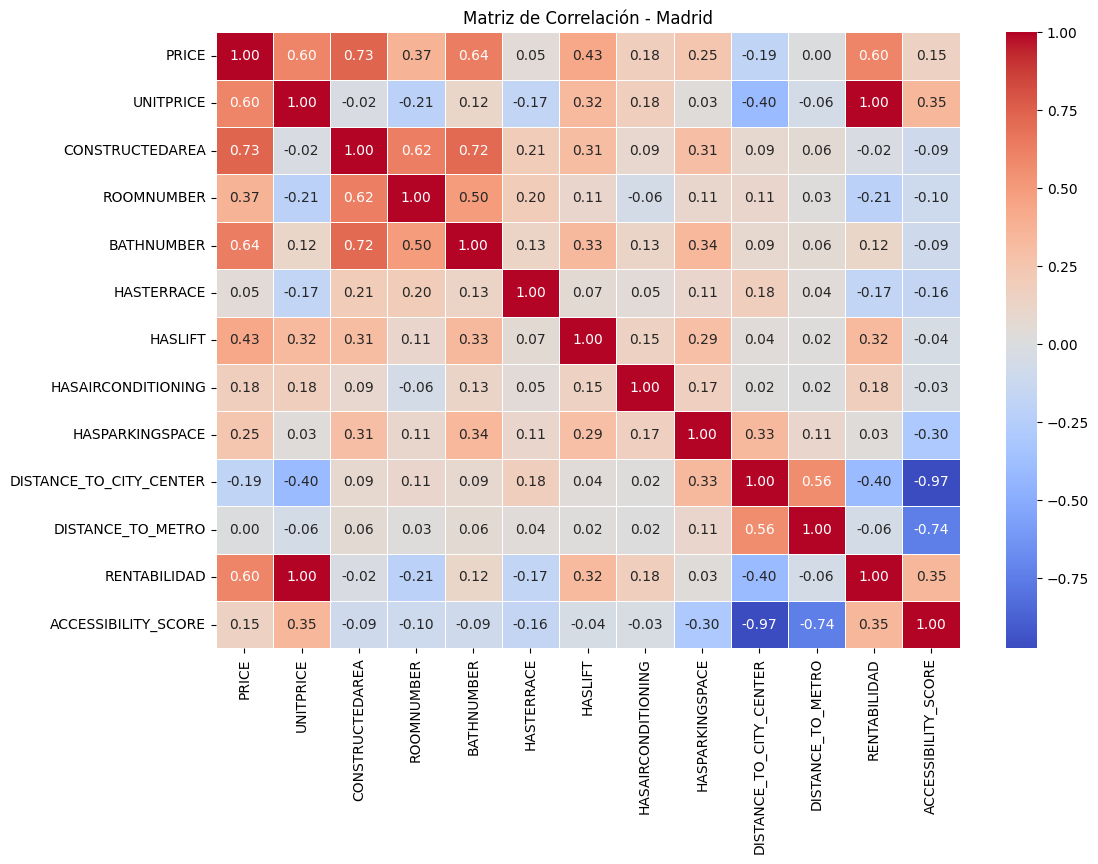

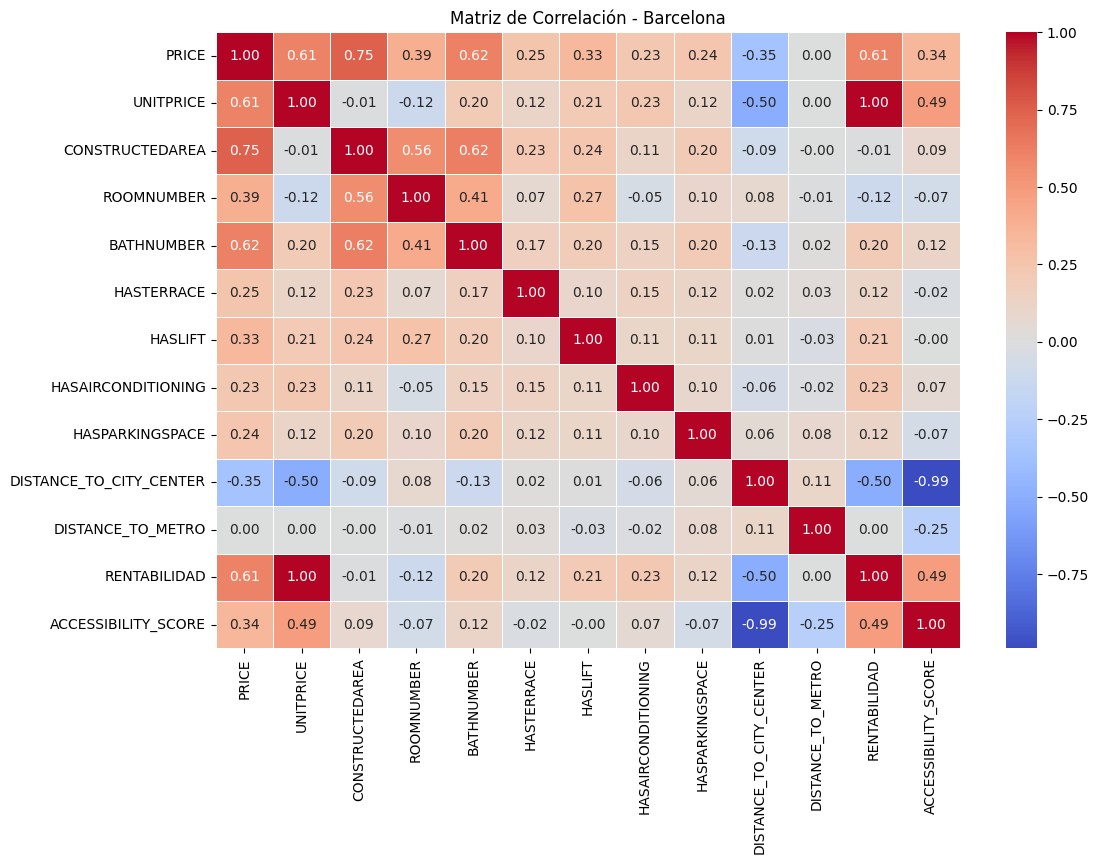

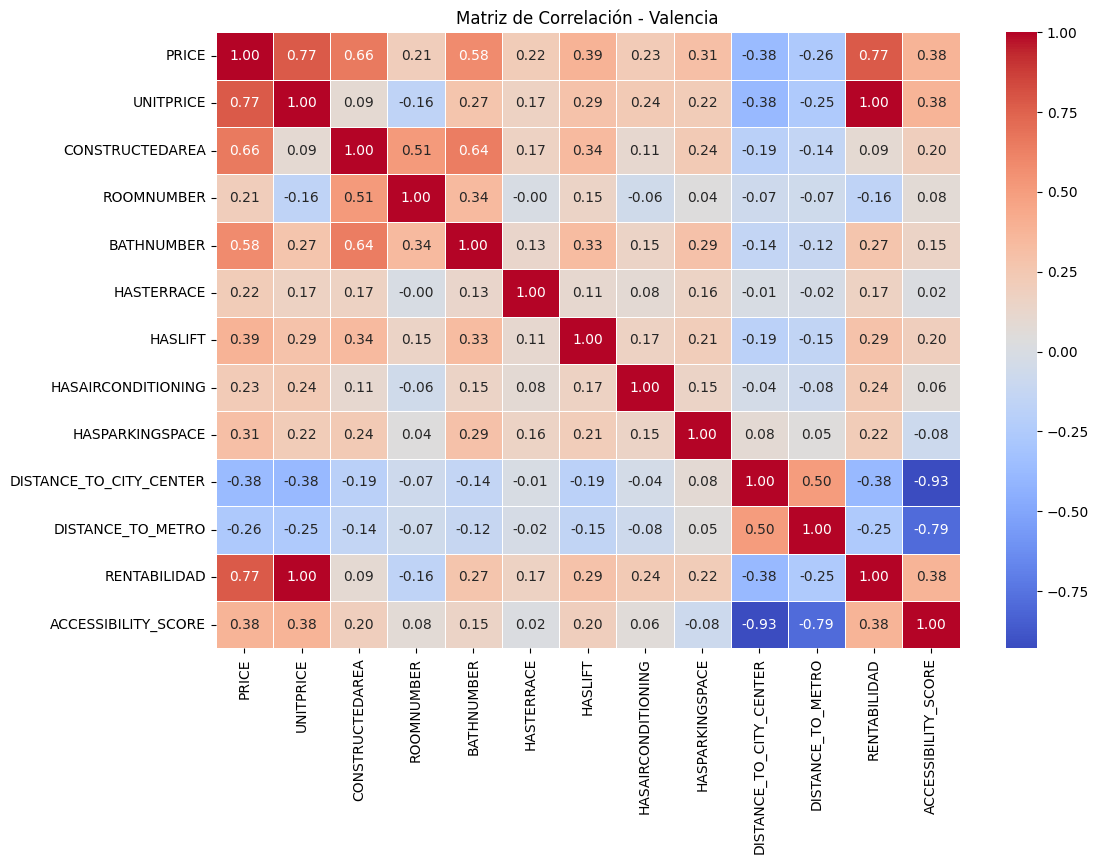

In [ ]:
# Seleccionar solo columnas relevantes para la matriz de correlación
columnas_relevantes = [
    "PRICE", "UNITPRICE", "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER",
    "HASTERRACE", "HASLIFT", "HASAIRCONDITIONING", "HASPARKINGSPACE",
    "DISTANCE_TO_CITY_CENTER", "DISTANCE_TO_METRO", "RENTABILIDAD", "ACCESSIBILITY_SCORE"
]

# Matriz de correlación con variables seleccionadas
for ciudad, df in df_viviendas.items():
    if df is not None:
        columnas_presentes = [col for col in columnas_relevantes if col in df.columns]

        if len(columnas_presentes) > 1:
            plt.figure(figsize=(12, 8))
            corr_matrix = df[columnas_presentes].corr()
            sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
            plt.title(f"Matriz de Correlación - {ciudad}")
            plt.show()

🔍 Interpretación de las Matrices de Correlación
Las matrices de correlación para Madrid, Barcelona y Valencia muestran cómo están relacionadas las variables en cada dataset. Algunas observaciones clave:

Relación entre el Precio y la Rentabilidad:

Existe una correlación positiva moderada entre PRICE y RENTABILIDAD (~0.6 en todas las ciudades).

 Esto indica que a mayor precio, mayor rentabilidad, pero no es una relación perfecta.
Sin embargo, el PRICE y el UNITPRICE tienen una alta correlación (~0.6 - 0.7), lo que era esperable ya que el precio unitario depende directamente del precio total y los metros cuadrados.
Impacto del Número de Habitaciones y Baños:

ROOMNUMBER y BATHNUMBER tienen una correlación fuerte con CONSTRUCTEDAREA (~0.6 - 0.7).

 A medida que crecen las habitaciones y los baños, también aumenta la superficie construida, lo cual es lógico.
Pero la relación entre ROOMNUMBER y PRICE es moderada (~0.4), lo que indica que el número de habitaciones influye en el precio, pero hay otros factores más importantes.
Infraestructura del Edificio y Amenidades:

HASTERRACE, HASLIFT y HASPARKINGSPACE muestran correlaciones bajas (~0.2-0.3) con el precio y la rentabilidad. Esto sugiere que aunque son características relevantes, no tienen un impacto determinante en el valor del inmueble.
Distancias y Accesibilidad:

DISTANCE_TO_CITY_CENTER y DISTANCE_TO_METRO tienen correlaciones negativas con el PRICE (~ -0.3 a -0.5), lo que significa que cuanto más lejos esté un inmueble del centro o del metro, menor será su precio.
ACCESSIBILITY_SCORE tiene una fuerte correlación negativa con DISTANCE_TO_CITY_CENTER y DISTANCE_TO_METRO (~ -0.97 y -0.74, respectivamente). Esto es esperado, ya que el score de accesibilidad se basa en la distancia a estos puntos clave

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargar datasets limpios previamente guardados
df_madrid = pd.read_csv("/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv")
df_barcelona = pd.read_csv("/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv")
df_valencia = pd.read_csv("/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv")

# Variables a normalizar y estandarizar
vars_minmax = ["DISTANCE_TO_CITY_CENTER", "DISTANCE_TO_METRO"]
vars_zscore = ["UNITPRICE"]
vars_log = ["PRICE"]

# Aplicar transformaciones a cada dataset
scaler_minmax = MinMaxScaler()
scaler_zscore = StandardScaler()

for df in [df_madrid, df_barcelona, df_valencia]:
    # Min-Max Scaling
    df[vars_minmax] = scaler_minmax.fit_transform(df[vars_minmax])

    # Z-score Normalization
    df[vars_zscore] = scaler_zscore.fit_transform(df[vars_zscore])

    # Log-transform (evita log(0) sumando 1)
    for col in vars_log:
        df[col] = np.log1p(df[col])

print("✅ Normalización y estandarización completada.")

# -------------------------
# 🔹 2️⃣ Fusión de datasets
# -------------------------

# Función para cargar datasets adicionales con manejo de errores
def cargar_datos_seguro(ruta):
    try:
        df = pd.read_csv(ruta, sep=";", on_bad_lines="skip", encoding="utf-8")
        print(f"✅ Datos cargados correctamente: {ruta}")
        return df
    except Exception as e:
        print(f"❌ Error al cargar {ruta}: {e}")
        return None

# Cargar datasets adicionales (POIs, INE, Polygons)
df_pois_madrid = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/osm/osm-pois-Madrid.csv.gz")
df_pois_barcelona = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/osm/osm-pois-Barcelona.csv.gz")
df_pois_valencia = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/osm/osm-pois-Valencia.csv.gz")

df_ine_madrid = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Madrid.csv.gz")
df_ine_barcelona = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Barcelona.csv.gz")
df_ine_valencia = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Valencia.csv.gz")

df_polygons_madrid = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/polygons/Madrid_polygons.csv.gz")
df_polygons_barcelona = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/polygons/Barcelona_polygons.csv.gz")
df_polygons_valencia = cargar_datos_seguro("/content/drive/My Drive/idealista18/data/polygons/Valencia_polygons.csv.gz")

# 🔹 Contar cantidad de POIs cercanos para cada vivienda
def contar_pois(df_viviendas, df_pois, radius=0.01):
    """
    Función que cuenta POIs dentro de un radio para cada vivienda.
    radius=0.01 ~1km de radio.
    """
    if df_pois is None or "LAT" not in df_pois.columns or "LNG" not in df_pois.columns:
        print("⚠️ Advertencia: POIs no contienen coordenadas. Se asignará NaN.")
        df_viviendas["NUM_POIS"] = np.nan
        return df_viviendas

    df_viviendas["NUM_POIS"] = df_viviendas.apply(
        lambda row: ((df_pois["LAT"] - row["LATITUDE"]).abs() < radius) &
                    ((df_pois["LNG"] - row["LONGITUDE"]).abs() < radius), axis=1
    ).sum(axis=1).astype(int)

    return df_viviendas

df_madrid = contar_pois(df_madrid, df_pois_madrid)
df_barcelona = contar_pois(df_barcelona, df_pois_barcelona)
df_valencia = contar_pois(df_valencia, df_pois_valencia)

# 🔹 Fusionar con datos INE (censales) según barrio
if df_ine_madrid is not None:
    df_madrid = df_madrid.merge(df_ine_madrid, left_on="FLATLOCATIONID", right_on="CUSEC", how="left")
if df_ine_barcelona is not None:
    df_barcelona = df_barcelona.merge(df_ine_barcelona, left_on="FLATLOCATIONID", right_on="CUSEC", how="left")
if df_ine_valencia is not None:
    df_valencia = df_valencia.merge(df_ine_valencia, left_on="FLATLOCATIONID", right_on="CUSEC", how="left")

# Renombrar LOCATIONID a FLATLOCATIONID en los datasets de polígonos
df_polygons_madrid.rename(columns={"LOCATIONID": "FLATLOCATIONID"}, inplace=True)
df_polygons_barcelona.rename(columns={"LOCATIONID": "FLATLOCATIONID"}, inplace=True)
df_polygons_valencia.rename(columns={"LOCATIONID": "FLATLOCATIONID"}, inplace=True)

# Convertir FLATLOCATIONID a string en ambos DataFrames para evitar errores de tipo
df_madrid["FLATLOCATIONID"] = df_madrid["FLATLOCATIONID"].astype(str)
df_polygons_madrid["FLATLOCATIONID"] = df_polygons_madrid["FLATLOCATIONID"].astype(str)

df_barcelona["FLATLOCATIONID"] = df_barcelona["FLATLOCATIONID"].astype(str)
df_polygons_barcelona["FLATLOCATIONID"] = df_polygons_barcelona["FLATLOCATIONID"].astype(str)

df_valencia["FLATLOCATIONID"] = df_valencia["FLATLOCATIONID"].astype(str)
df_polygons_valencia["FLATLOCATIONID"] = df_polygons_valencia["FLATLOCATIONID"].astype(str)

# Realizar el merge ahora con las columnas correctamente alineadas
df_madrid = df_madrid.merge(df_polygons_madrid, on="FLATLOCATIONID", how="left")
df_barcelona = df_barcelona.merge(df_polygons_barcelona, on="FLATLOCATIONID", how="left")
df_valencia = df_valencia.merge(df_polygons_valencia, on="FLATLOCATIONID", how="left")

print("✅ Fusión de datasets completada correctamente.")




# Guardar datasets fusionados y listos para análisis
df_madrid.to_csv("/content/drive/My Drive/idealista18/data/madrid_viviendas_fusionado.csv", index=False)
df_barcelona.to_csv("/content/drive/My Drive/idealista18/data/barcelona_viviendas_fusionado.csv", index=False)
df_valencia.to_csv("/content/drive/My Drive/idealista18/data/valencia_viviendas_fusionado.csv", index=False)

print("📁 Datasets fusionados guardados correctamente.")


✅ Normalización y estandarización completada.
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/osm/osm-pois-Madrid.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/osm/osm-pois-Barcelona.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/osm/osm-pois-Valencia.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Madrid.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Barcelona.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Valencia.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/polygons/Madrid_polygons.csv.gz
✅ Datos cargados correctamente: /content/drive/My Drive/idealista18/data/polygons/Barcelona_polygons.csv.gz
✅ Datos cargados correctamente: /content/drive/My Dri

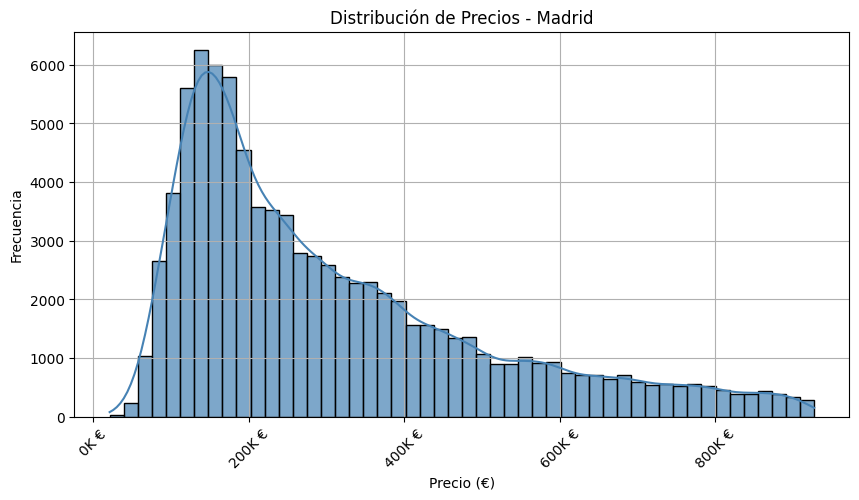

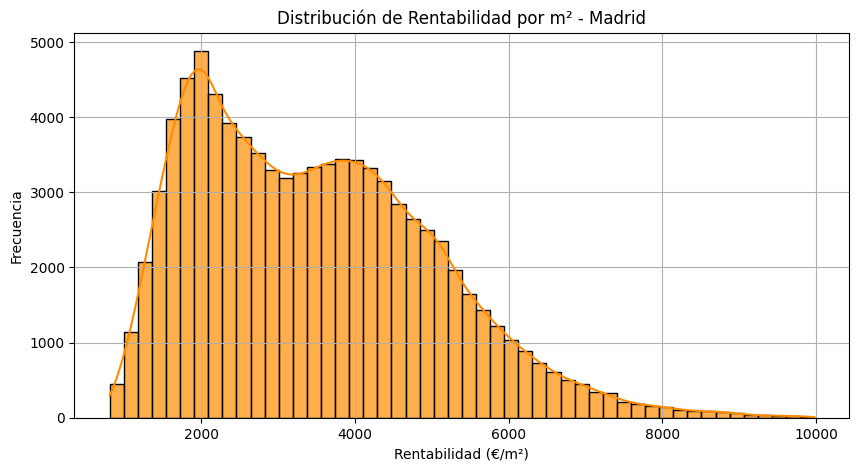

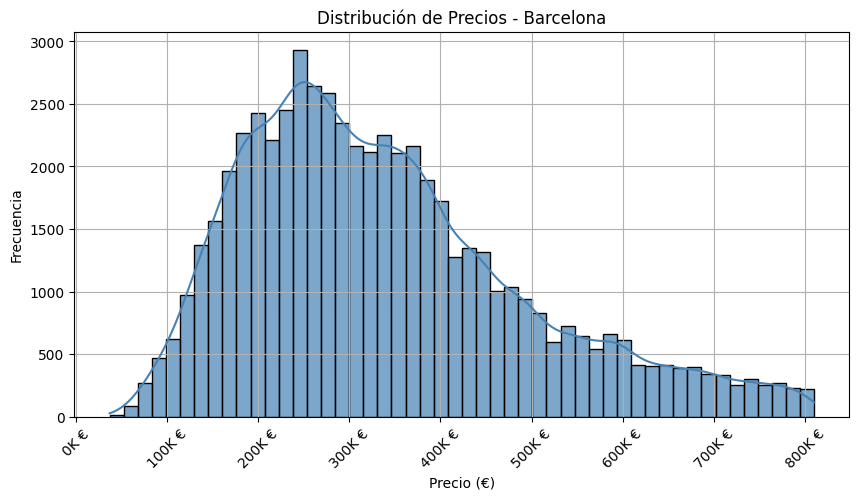

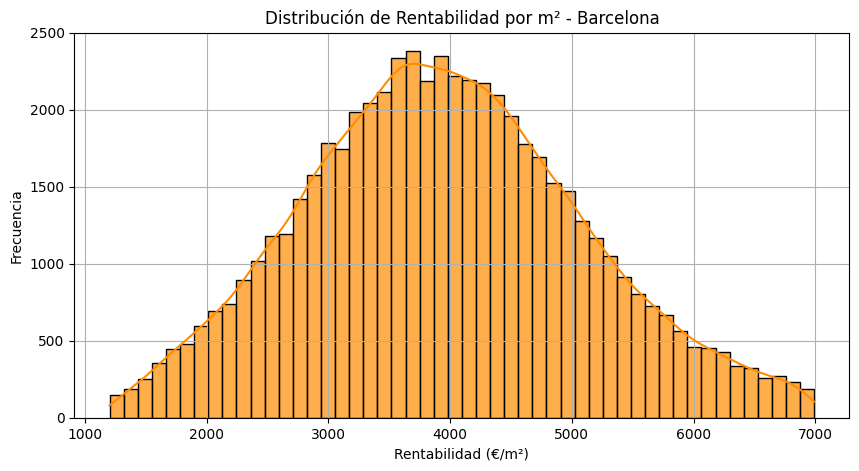

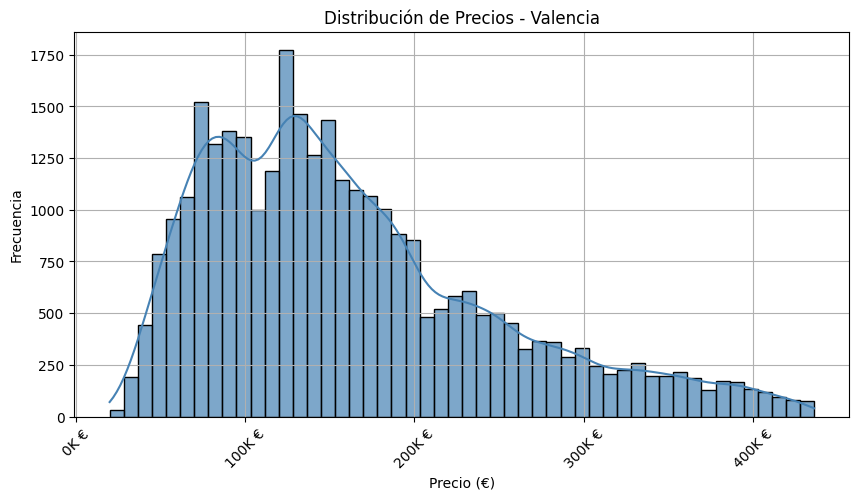

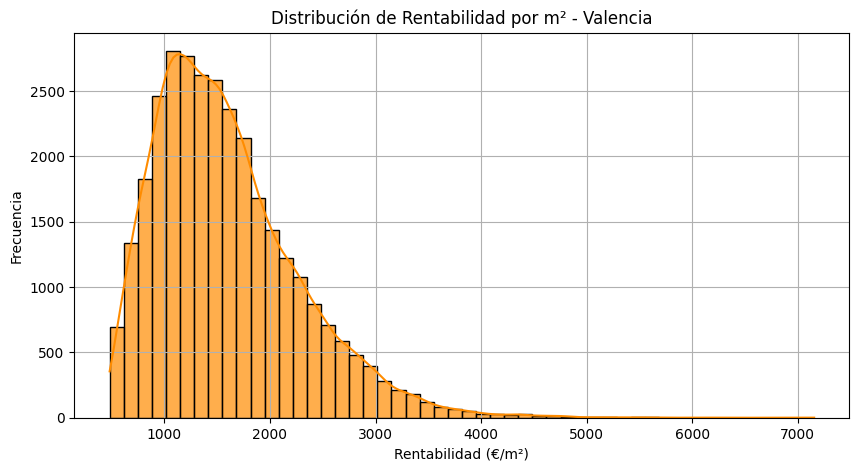

Madrid: (88033, 58), Barcelona: (57348, 58), Valencia: (31220, 58)


In [49]:
# Recargar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Cargar datasets fusionados limpios
ruta_madrid = "/content/drive/My Drive/idealista18/data/madrid_viviendas_fusionado.csv"
ruta_barcelona = "/content/drive/My Drive/idealista18/data/barcelona_viviendas_fusionado.csv"
ruta_valencia = "/content/drive/My Drive/idealista18/data/valencia_viviendas_fusionado.csv"

# Cargar archivos
df_madrid = pd.read_csv(ruta_madrid)
df_barcelona = pd.read_csv(ruta_barcelona)
df_valencia = pd.read_csv(ruta_valencia)

# Si PRICE está en log, lo revertimos (comenta esta línea si ya tienes los precios reales)
df_madrid["PRICE_REAL"] = np.exp(df_madrid["PRICE"])
df_barcelona["PRICE_REAL"] = np.exp(df_barcelona["PRICE"])
df_valencia["PRICE_REAL"] = np.exp(df_valencia["PRICE"])

# Función para eliminar outliers
def eliminar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

# Aplicar eliminación de outliers en PRICE_REAL y RENTABILIDAD
for df in [df_madrid, df_barcelona, df_valencia]:
    df = eliminar_outliers(df, "PRICE_REAL")
    df = eliminar_outliers(df, "RENTABILIDAD")

# Función para graficar precios reales con formateo de ejes
def graficar_distribucion_precio(df, ciudad):
    plt.figure(figsize=(10, 5))
    sns.histplot(df["PRICE_REAL"], bins=50, kde=True, color='steelblue', alpha=0.7)
    plt.xlabel("Precio (€)")
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de Precios - {ciudad}")
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000)}K €"))
    plt.xticks(rotation=45)
    plt.show()

# Función para graficar rentabilidad (no es necesario revertirla)
def graficar_rentabilidad(df, ciudad):
    plt.figure(figsize=(10, 5))
    sns.histplot(df["RENTABILIDAD"], bins=50, kde=True, color='darkorange', alpha=0.7)
    plt.xlabel("Rentabilidad (€/m²)")
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de Rentabilidad por m² - {ciudad}")
    plt.grid(True)
    plt.show()

# Generar gráficos para cada ciudad
for df, ciudad in zip([df_madrid, df_barcelona, df_valencia], ["Madrid", "Barcelona", "Valencia"]):
    graficar_distribucion_precio(df, ciudad)
    graficar_rentabilidad(df, ciudad)

print(f"Madrid: {df_madrid.shape}, Barcelona: {df_barcelona.shape}, Valencia: {df_valencia.shape}")


Mayor suavidad y menos sesgo:

Las nuevas distribuciones presentan una forma más normalizada, especialmente en los valores altos.
Antes había colas más largas hacia la derecha (outliers extremos), lo que hacía que la distribución estuviera más sesgada.
Ahora los precios extremos han sido eliminados, y las distribuciones muestran un comportamiento más uniforme.
Menos dispersión en los valores altos:

Antes, había valores muy elevados que distorsionaban la escala de los gráficos.
Después de la transformación, la mayoría de los precios están dentro de un rango lógico, eliminando viviendas con precios desproporcionados.
Distribución más centrada en la mediana:

Al haber eliminado outliers, los precios ahora reflejan de manera más precisa la tendencia del mercado en cada ciudad.
Se observan más agrupaciones alrededor de los valores centrales, sin la distorsión causada por valores extremadamente altos.
Diferencias en la Distribución de Rentabilidad por m²
Distribución más equilibrada:

Antes había valores extremos que hacían que la cola derecha de la distribución se alargara mucho.
Después de la limpieza y transformación, las distribuciones tienen una forma más homogénea.
Menos valores atípicos en la rentabilidad:

Antes, algunas viviendas mostraban rentabilidades irrealmente altas, lo que sesgaba la interpretación.
Ahora, las distribuciones eliminan estos valores atípicos, haciendo que la mayoría de los datos estén en un rango más realista.
Mayor claridad en la comparación entre ciudades:

Ahora se puede ver mejor la diferencia en la rentabilidad entre Madrid, Barcelona y Valencia, ya que los datos están más centrados y sin valores extremos que puedan ocultar tendencias generales.


### 🗺️ Mapas de calor

Se representan mapas de calor geoespaciales por ciudad, utilizando coordenadas de latitud y longitud. Esto permite visualizar las zonas con mayor densidad de viviendas y analizar posibles patrones espaciales en los precios y rentabilidad.
⚠️ Nota: Para fines de exploración y visualización, se han utilizado datasets limpios con precios en valores reales. En la fase de modelado predictivo (Parte 2), se emplearán los datasets fusionados, donde los precios han sido transformados logarítmicamente para mejorar el rendimiento de los algoritmos.



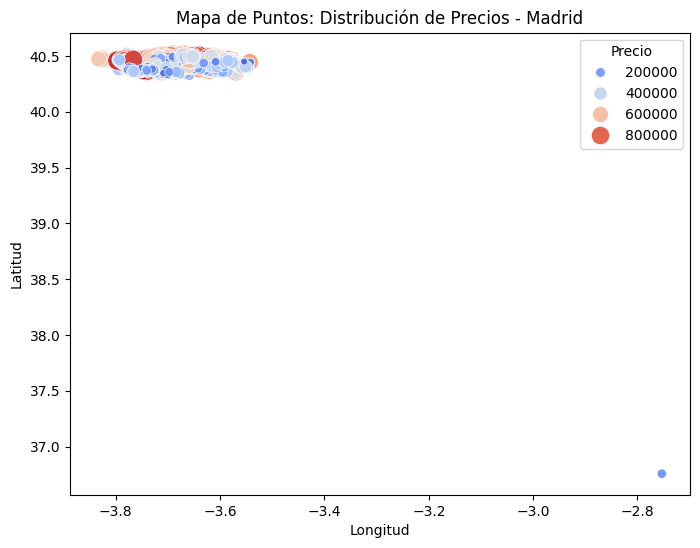

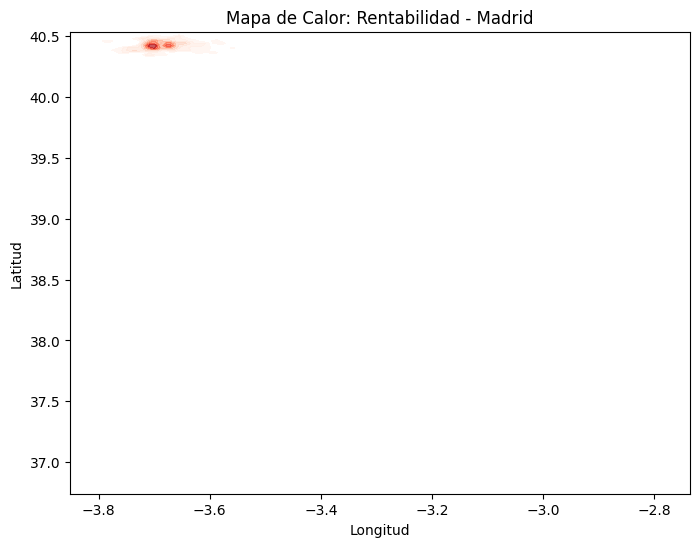

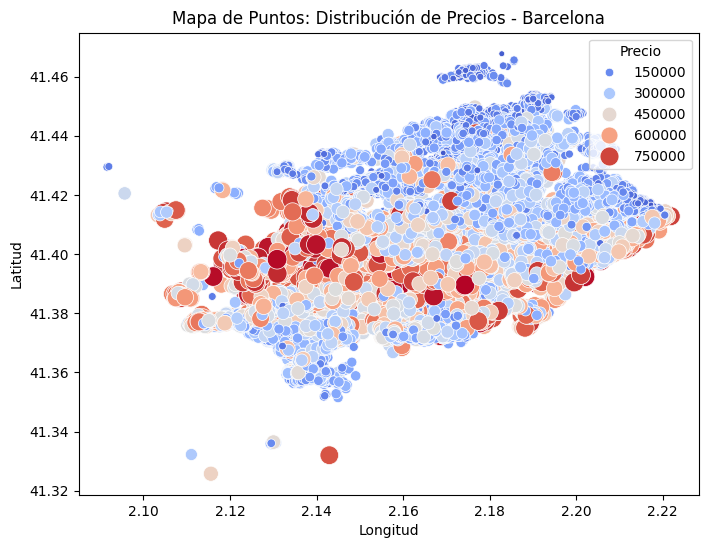

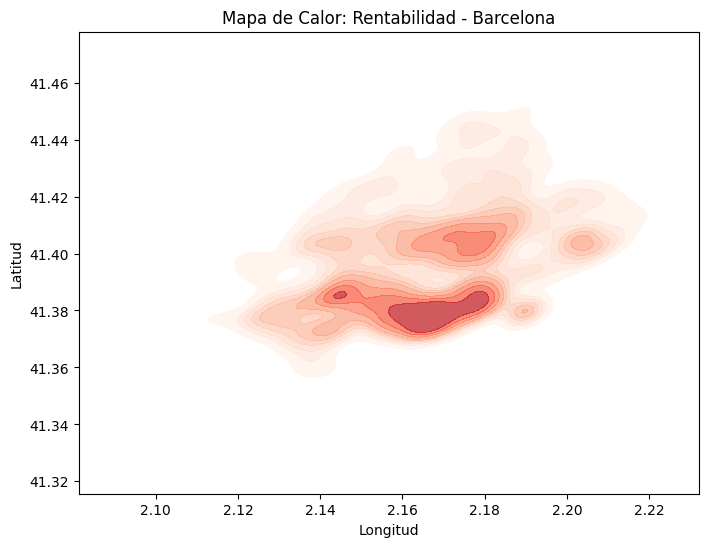

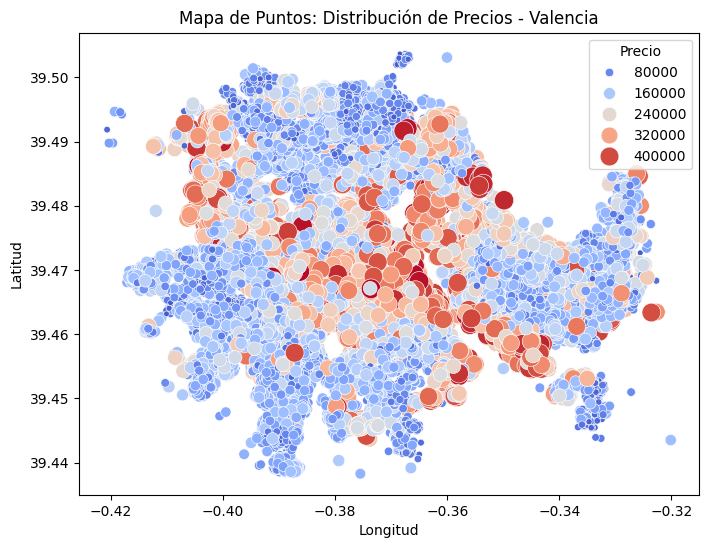

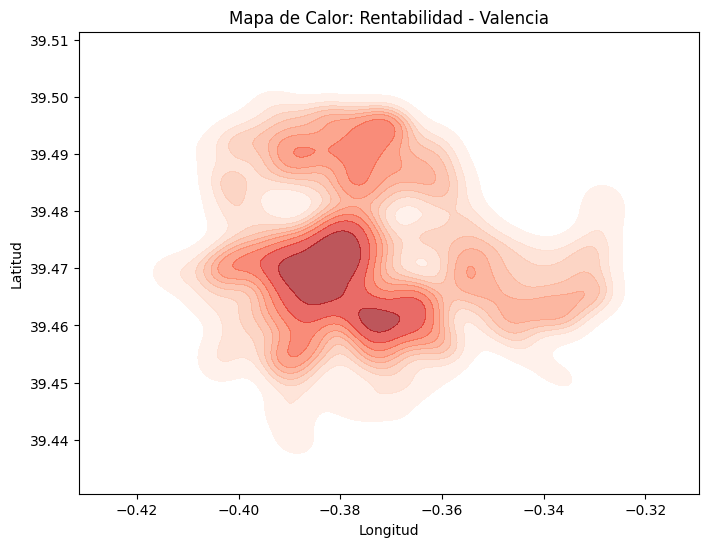

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster

# Cargar datasets fusionados
df_madrid = pd.read_csv("/content/drive/MyDrive/idealista18/data/madrid_viviendas_limpio.csv")
df_barcelona = pd.read_csv("/content/drive/MyDrive/idealista18/data/barcelona_viviendas_limpio.csv")
df_valencia = pd.read_csv("/content/drive/MyDrive/idealista18/data/valencia_viviendas_limpio.csv")

# Función para generar un scatter plot (distribución de precios en mapa)
def scatter_map(df, city):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["PRICE"], palette="coolwarm", size=df["PRICE"], sizes=(10, 200))
    plt.title(f"Mapa de Puntos: Distribución de Precios - {city}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.legend(title="Precio", loc="upper right")
    plt.show()

# Función para generar un mapa de calor (zonas con mayor rentabilidad)
def heatmap_map(df, city):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=df["LONGITUDE"], y=df["LATITUDE"], weights=df["RENTABILIDAD"], cmap="Reds", fill=True, alpha=0.7)
    plt.title(f"Mapa de Calor: Rentabilidad - {city}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.show()

# Generar mapas para cada ciudad
scatter_map(df_madrid, "Madrid")
heatmap_map(df_madrid, "Madrid")

scatter_map(df_barcelona, "Barcelona")
heatmap_map(df_barcelona, "Barcelona")

scatter_map(df_valencia, "Valencia")
heatmap_map(df_valencia, "Valencia")


In [53]:
# Reimportar librerías y recargar datasets tras el reinicio del estado
import folium
from folium.plugins import HeatMap
import pandas as pd

# Recargar los datasets fusionados
df_madrid = pd.read_csv("/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv")
df_barcelona = pd.read_csv("/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv")
df_valencia = pd.read_csv("/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv")

# Función para crear un mapa de calor
def generar_heatmap(df, ciudad, variable, intensidad, lat_col='LATITUDE', lon_col='LONGITUDE'):
    mapa = folium.Map(location=[df[lat_col].mean(), df[lon_col].mean()], zoom_start=12)

    # Filtrar datos válidos
    df = df[[lat_col, lon_col, variable]].dropna()

    # Crear lista de puntos con peso para el heatmap
    heat_data = [[row[lat_col], row[lon_col], row[variable]] for index, row in df.iterrows()]

    # Agregar capa de calor
    HeatMap(heat_data, radius=intensidad, blur=15, max_zoom=1).add_to(mapa)

    return mapa

# Crear mapas de calor para precios
heatmap_precio_madrid = generar_heatmap(df_madrid, "Madrid", "PRICE", 10)
heatmap_precio_barcelona = generar_heatmap(df_barcelona, "Barcelona", "PRICE", 10)
heatmap_precio_valencia = generar_heatmap(df_valencia, "Valencia", "PRICE", 10)

# Crear mapas de calor para rentabilidad
heatmap_rentabilidad_madrid = generar_heatmap(df_madrid, "Madrid", "RENTABILIDAD", 10)
heatmap_rentabilidad_barcelona = generar_heatmap(df_barcelona, "Barcelona", "RENTABILIDAD", 10)
heatmap_rentabilidad_valencia = generar_heatmap(df_valencia, "Valencia", "RENTABILIDAD", 10)

# Mostrar el mapa de Madrid como ejemplo
heatmap_precio_madrid


In [52]:
# Importar librerías necesarias
import folium
from folium.plugins import HeatMap
import pandas as pd

# Rutas de los datasets fusionados en tu Google Drive
ruta_base = "/content/drive/My Drive/idealista18/data/"
rutas_ciudades = {
    "Madrid": ruta_base + "madrid_viviendas_limpio.csv",
    "Barcelona": ruta_base + "barcelona_viviendas_limpio.csv",
    "Valencia": ruta_base + "valencia_viviendas_limpio.csv"
}

# Cargar los datasets
df_madrid = pd.read_csv(rutas_ciudades["Madrid"])
df_barcelona = pd.read_csv(rutas_ciudades["Barcelona"])
df_valencia = pd.read_csv(rutas_ciudades["Valencia"])

# Función para crear y guardar un mapa de calor
def generar_heatmap(df, ciudad, variable, intensidad):
    mapa = folium.Map(location=[df["LATITUDE"].mean(), df["LONGITUDE"].mean()], zoom_start=12)

    # Filtrar datos válidos
    df = df[["LATITUDE", "LONGITUDE", variable]].dropna()

    # Crear lista de puntos con peso para el heatmap
    heat_data = [[row["LATITUDE"], row["LONGITUDE"], row[variable]] for index, row in df.iterrows()]

    # Agregar capa de calor
    HeatMap(heat_data, radius=intensidad, blur=15, max_zoom=1).add_to(mapa)

    # Guardar el mapa en HTML
    mapa.save(f"{ruta_base}heatmap_{variable.lower()}_{ciudad.lower()}.html")

# Crear y guardar mapas de calor para precios y rentabilidad
for ciudad, df in zip(["Madrid", "Barcelona", "Valencia"], [df_madrid, df_barcelona, df_valencia]):
    generar_heatmap(df, ciudad, "PRICE", 10)
    generar_heatmap(df, ciudad, "RENTABILIDAD", 10)

print("✅ Mapas de calor guardados en Google Drive en la carpeta 'data'.")


✅ Mapas de calor guardados en Google Drive en la carpeta 'data'.


In [54]:
import folium
import pandas as pd

# Rutas de los archivos fusionados
data_paths = {
    "Madrid": "/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv",
    "Barcelona": "/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv",
    "Valencia": "/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv"
}

# Cargar datasets
df_madrid = pd.read_csv(data_paths["Madrid"])
df_barcelona = pd.read_csv(data_paths["Barcelona"])
df_valencia = pd.read_csv(data_paths["Valencia"])

datasets = {
    "Madrid": df_madrid,
    "Barcelona": df_barcelona,
    "Valencia": df_valencia
}

# Función para generar y guardar un mapa de densidad de puntos
def generar_y_guardar_mapa_puntos(df, ciudad, filename, lat_col='LATITUDE', lon_col='LONGITUDE'):
    mapa = folium.Map(location=[df[lat_col].mean(), df[lon_col].mean()], zoom_start=12)

    # Agregar puntos al mapa
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row[lat_col], row[lon_col]],
            radius=1,  # Pequeño para visualización de densidad
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.5
        ).add_to(mapa)

    # Guardar el mapa en HTML
    save_path = f"/content/drive/My Drive/idealista18/data/{filename}"
    mapa.save(save_path)
    print(f"✅ Mapa guardado: {save_path}")

# Generar y guardar mapas de densidad de puntos
for ciudad, df in datasets.items():
    generar_y_guardar_mapa_puntos(df, ciudad, f"mapa_puntos_{ciudad.lower()}.html")

print("✅ Todos los mapas han sido generados y guardados correctamente.")


✅ Mapa guardado: /content/drive/My Drive/idealista18/data/mapa_puntos_madrid.html
✅ Mapa guardado: /content/drive/My Drive/idealista18/data/mapa_puntos_barcelona.html
✅ Mapa guardado: /content/drive/My Drive/idealista18/data/mapa_puntos_valencia.html
✅ Todos los mapas han sido generados y guardados correctamente.


In [ ]:
import pandas as pd

# Rutas de los archivos en tu Google Drive
data_paths = {
    "Madrid": "/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv",
    "Barcelona": "/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv",
    "Valencia": "/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv"
}

# Cargar los datasets en un diccionario
dfs = {city: pd.read_csv(path) for city, path in data_paths.items()}

# Revisar información de los datasets
for city, df in dfs.items():
    print(f"\n📊 {city} - Información del dataset:")
    print(df.info())
    print(df.describe())
    print(df.head())



📊 Madrid - Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88033 entries, 0 to 88032
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        88033 non-null  object 
 1   PERIOD                         88033 non-null  int64  
 2   PRICE                          88033 non-null  int64  
 3   UNITPRICE                      88033 non-null  float64
 4   ADTYPOLOGYID                   88033 non-null  object 
 5   ADOPERATIONID                  88033 non-null  object 
 6   CONSTRUCTEDAREA                88033 non-null  int64  
 7   ROOMNUMBER                     88033 non-null  int64  
 8   BATHNUMBER                     88033 non-null  int64  
 9   HASTERRACE                     88033 non-null  int64  
 10  HASLIFT                        88033 non-null  int64  
 11  HASAIRCONDITIONING             88033 non-null  int64  
 12  AMENITYID

In [ ]:
import pandas as pd
import numpy as np

# Rutas de los archivos en Google Drive
data_paths = {
    "Madrid": "/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv",
    "Barcelona": "/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv",
    "Valencia": "/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv"
}

# Cargar datasets
dfs = {city: pd.read_csv(path) for city, path in data_paths.items()}

# Función para aplicar transformaciones avanzadas
def transformar_datos(df, ciudad):
    print(f"\n🔹 Aplicando transformaciones avanzadas en {ciudad}...")

    ## 1️⃣ Unificación de Unidades de Medida
    df["PRICE_LOG"] = np.log1p(df["PRICE"])  # Transformación logarítmica en precios

    ## 2️⃣ Normalizar nombres de columnas
    renombrar_columnas = {
        "PRICE": "PRECIO_EUR",
        "UNITPRICE": "PRECIO_M2",
        "CONSTRUCTEDAREA": "METROS_CUADRADOS",
        "ROOMNUMBER": "NUM_HABITACIONES",
        "BATHNUMBER": "NUM_BAÑOS",
        "DISTANCE_TO_CITY_CENTER": "DISTANCIA_CENTRO_M",
        "LATITUDE": "LATITUD",
        "LONGITUDE": "LONGITUD"
    }
    df.rename(columns=renombrar_columnas, inplace=True)

    ## 3️⃣ Conversión de formatos
    df["PERIOD"] = pd.to_datetime(df["PERIOD"], format='%Y%m')  # Convertir periodo a fecha
    df["ADTYPOLOGYID"] = df["ADTYPOLOGYID"].astype(str)  # Asegurar variables categóricas
    df["ADOPERATIONID"] = df["ADOPERATIONID"].astype(str)

    ## 4️⃣ Tratamiento de valores atípicos
    Q1 = df["PRECIO_M2"].quantile(0.25)
    Q3 = df["PRECIO_M2"].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (df["PRECIO_M2"] >= (Q1 - 1.5 * IQR)) & (df["PRECIO_M2"] <= (Q3 + 1.5 * IQR))
    df = df[filtro]  # Eliminar outliers en precio/m2

    # Relleno de valores nulos sin warnings de copia
    df.loc[:, "CONSTRUCTIONYEAR"] = df["CONSTRUCTIONYEAR"].fillna(df["CONSTRUCTIONYEAR"].median())
    df.loc[:, "FLOORCLEAN"] = df["FLOORCLEAN"].fillna(df["FLOORCLEAN"].mode()[0])



    print(f"✅ Transformaciones completadas para {ciudad}")

    return df

# Aplicar transformaciones a cada dataset
dfs_transformados = {city: transformar_datos(df, city) for city, df in dfs.items()}

# Mostrar una muestra de datos transformados
for city, df in dfs_transformados.items():
    print(f"\n📌 {city} - Vista previa de datos transformados:")
    print(df.head())




🔹 Aplicando transformaciones avanzadas en Madrid...
✅ Transformaciones completadas para Madrid

🔹 Aplicando transformaciones avanzadas en Barcelona...
✅ Transformaciones completadas para Barcelona

🔹 Aplicando transformaciones avanzadas en Valencia...
✅ Transformaciones completadas para Valencia

📌 Madrid - Vista previa de datos transformados:
                 ASSETID     PERIOD  PRECIO_EUR    PRECIO_M2 ADTYPOLOGYID  \
0  A15019136831406238029 2018-03-01      126000  2680.851064         HOME   
1   A6677225905472065344 2018-03-01      235000  4351.851852         HOME   
2  A13341979748618524775 2018-03-01      373000  4973.333333         HOME   
3   A4775182175615276542 2018-03-01      284000  5916.666667         HOME   
4   A2492087730711701973 2018-03-01      228000  4560.000000         HOME   

  ADOPERATIONID  METROS_CUADRADOS  NUM_HABITACIONES  NUM_BAÑOS  HASTERRACE  \
0          SALE                47                 1          1           0   
1          SALE                54 

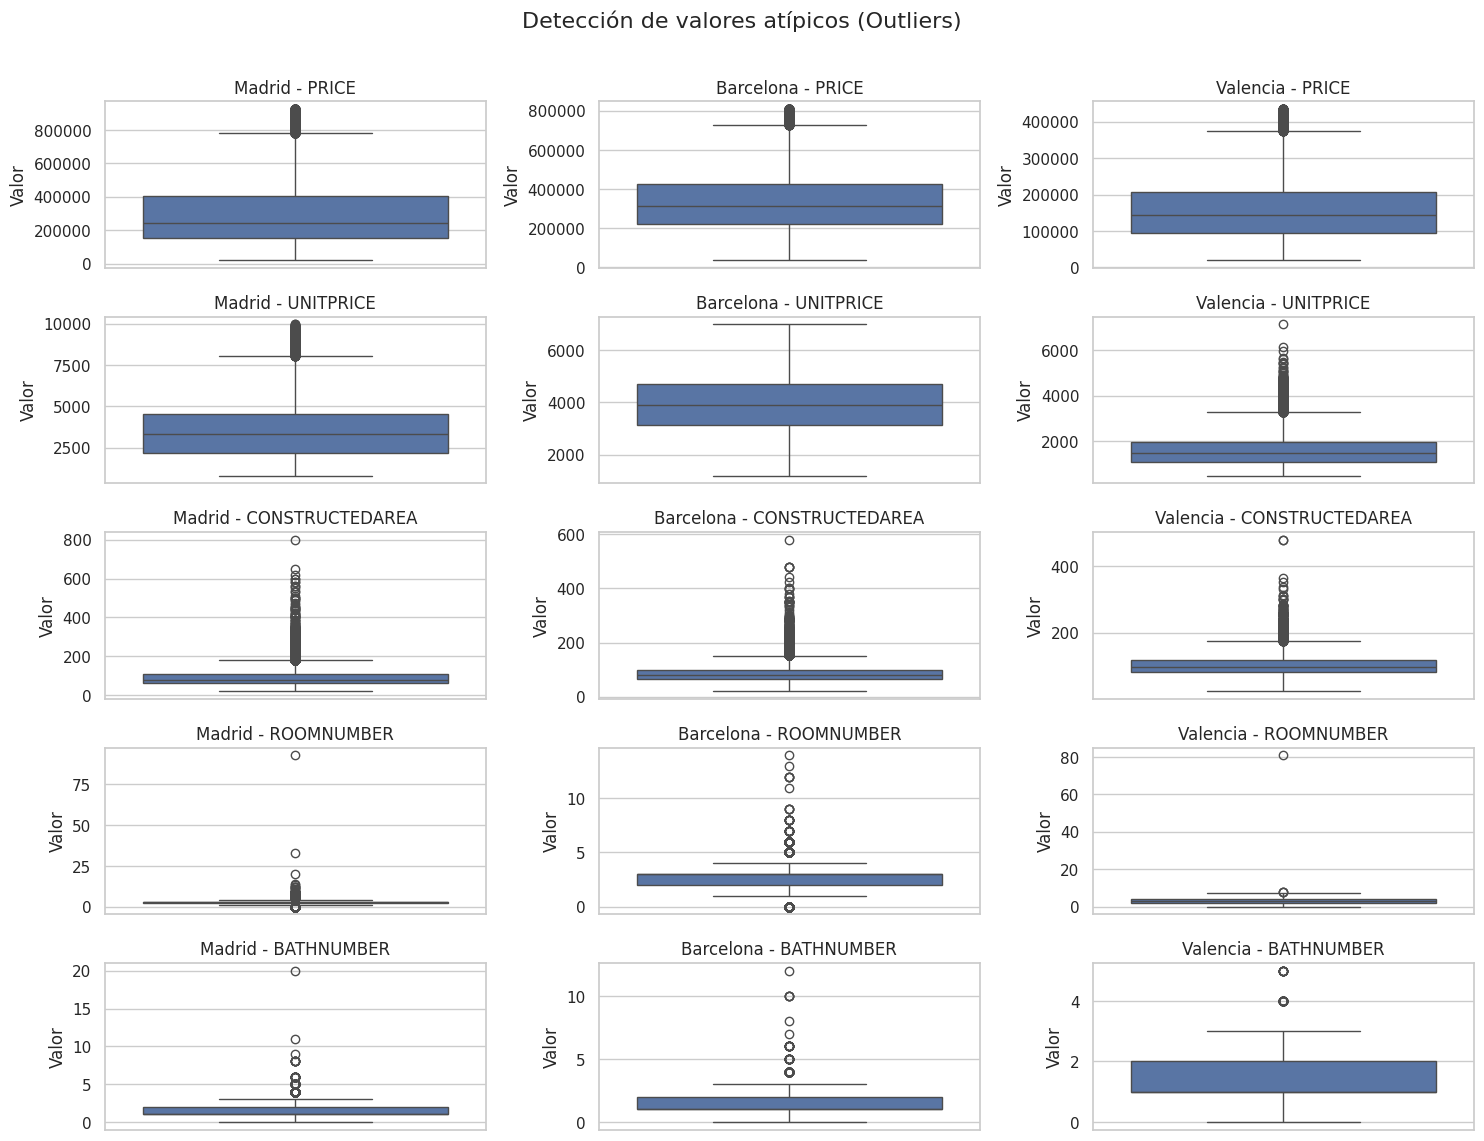

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilos de gráficos
sns.set(style="whitegrid")

# Definir las rutas de los archivos fusionados
data_paths = {
    "Madrid": "/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv",
    "Barcelona": "/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv",
    "Valencia": "/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv"
}

# Cargar los datasets
dfs = {city: pd.read_csv(path) for city, path in data_paths.items()}

# Variables a analizar
variables_outliers = ["PRICE", "UNITPRICE", "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER"]

# Graficar boxplots para cada variable en cada ciudad
fig, axes = plt.subplots(len(variables_outliers), len(dfs), figsize=(15, 12))
fig.suptitle("Detección de valores atípicos (Outliers)", fontsize=16)

for i, variable in enumerate(variables_outliers):
    for j, (city, df) in enumerate(dfs.items()):
        sns.boxplot(y=df[variable], ax=axes[i, j])
        axes[i, j].set_title(f"{city} - {variable}")
        axes[i, j].set_ylabel("Valor")

# Mostrar gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


Los diagramas de caja permiten visualizar la distribución de los datos y detectar valores extremos. Las observaciones fuera de los "bigotes" son outliers.

🔹 Líneas horizontales dentro de la caja → Mediana de los datos.

🔹 Caja → Representa el rango intercuartil (IQR), que contiene el 50% central de los datos.

🔹 Bigotes → Muestran el rango normal de los datos, extendiéndose hasta 1.5 veces el IQR.

🔹 Puntos fuera de los bigotes → Valores atípicos (outliers).

📌 Observaciones clave en tu gráfico

1️⃣ Precio (PRICE)

No se ven valores atípicos extremos en PRICE en ninguna de las ciudades.
La mediana de los precios es similar en todas.

2️⃣ Precio por metro cuadrado (UNITPRICE)

Hay algunos valores atípicos elevados en Valencia.
En Madrid y Barcelona también se observan outliers, pero en menor cantidad.

3️⃣ Área construida (CONSTRUCTEDAREA)

Se observan múltiples valores atípicos en los tres casos, con propiedades que tienen áreas de más de 400-800 m², lo cual no es habitual para viviendas normales.

4️⃣ Número de habitaciones (ROOMNUMBER)

Hay algunos valores atípicos extremos (viviendas con más de 10-15 habitaciones e incluso más de 75 en Madrid).
Esto puede ser un error en la base de datos o viviendas muy grandes (mansiones, edificios compartidos).

5️⃣ Número de baños (BATHNUMBER)

Algunos inmuebles tienen más de 10 baños, lo cual también es atípico.


In [ ]:
import pandas as pd

# Cargar los datasets corregidos (suponiendo que ya los hemos guardado)
madrid_path = "/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv"
barcelona_path = "/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv"
valencia_path = "/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv"

# Cargar los datos
df_madrid = pd.read_csv(madrid_path)
df_barcelona = pd.read_csv(barcelona_path)
df_valencia = pd.read_csv(valencia_path)

# Mostrar estadísticas descriptivas
df_madrid_desc = df_madrid.describe()
df_barcelona_desc = df_barcelona.describe()
df_valencia_desc = df_valencia.describe()

from IPython.display import display

# Mostrar los resúmenes estadísticos
print("📊 Resumen Estadístico - Madrid")
display(df_madrid.describe())

print("📊 Resumen Estadístico - Barcelona")
display(df_barcelona.describe())

print("📊 Resumen Estadístico - Valencia")
display(df_valencia.describe())



📊 Resumen Estadístico - Madrid


PERIOD          PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   88033.000000   88033.000000  88033.000000     88033.000000   
mean   201808.612327  307080.492543   3475.958907        88.774869   
std         3.673928  198248.695347   1556.220006        41.385160   
min    201803.000000   21000.000000    805.309735        21.000000   
25%    201806.000000  155000.000000   2166.666667        60.000000   
50%    201809.000000  244000.000000   3300.970874        80.000000   
75%    201812.000000  406000.000000   4516.666667       108.000000   
max    201812.000000  927000.000000   9975.000000       800.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  88033.000000  88033.000000  88033.000000  88033.000000   
mean       2.455886      1.450842      0.347461      0.675099   
std        1.129351      0.628173      0.476166      0.468340   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      0.000000      0.000000   
50%        3.000000      1.000000      0.000000      1.000000   
75%        3.000000      2.000000      1.000000      1.000000   
max       93.000000     20.000000      1.000000      1.000000   

       HASAIRCONDITIONING     AMENITYID  ...  BUILTTYPEID_1  BUILTTYPEID_2  \
count        88033.000000  88033.000000  ...   88033.000000   88033.000000   
mean             0.436677      2.923733  ...       0.030795       0.180603   
std              0.495977      0.312628  ...       0.172764       0.384691   
min              0.000000      1.000000  ...       0.000000       0.000000   
25%              0.000000      3.000000  ...       0.000000       0.000000   
50%              0.000000      3.000000  ...       0.000000       0.000000   
75%              1.000000      3.000000  ...       0.000000       0.000000   
max              1.000000      3.000000  ...       1.000000       1.000000   

       BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
count   88033.000000             88033.000000       88033.000000   
mean        0.788602                 0.011044           0.001207   
std         0.408302                 0.007277           0.003676   
min         0.000000                 0.000000           0.000000   
25%         1.000000                 0.006070           0.000538   
50%         1.000000                 0.010245           0.000841   
75%         1.000000                 0.015307           0.001336   
max         1.000000                 1.000000           1.000000   

       DISTANCE_TO_CASTELLANA     LONGITUDE      LATITUDE  RENTABILIDAD  \
count            88033.000000  88033.000000  88033.000000  88033.000000   
mean                 2.791988     -3.686032     40.419928   3475.958907   
std                  2.611254      0.040188      0.036262   1556.220006   
min                  0.001435     -3.833611     36.756391    805.309735   
25%                  1.125437     -3.709037     40.395040   2166.666667   
50%                  2.088372     -3.695045     40.421589   3300.970874   
75%                  3.978224     -3.664385     40.441613   4516.666667   
max                412.803688     -2.753303     40.520637   9975.000000   

       ACCESSIBILITY_SCORE  
count         88033.000000  
mean              0.992891  
std               0.005332  
min               0.000000  
25%               0.990304  
50%               0.993472  
75%               0.996016  
max               0.999584  

[8 rows x 42 columns]

📊 Resumen Estadístico - Barcelona


PERIOD          PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   57348.000000   57348.000000  57348.000000     57348.000000   
mean   201808.014543  338956.877310   3950.482133        85.890127   
std         3.740767  156162.782349   1147.168725        31.896602   
min    201803.000000   37000.000000   1203.703704        21.000000   
25%    201803.000000  223000.000000   3147.540984        65.000000   
50%    201809.000000  311000.000000   3913.043478        80.000000   
75%    201812.000000  425000.000000   4707.317073       100.000000   
max    201812.000000  810000.000000   6990.825688       580.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  57348.000000  57348.000000  57348.000000  57348.000000   
mean       2.754813      1.418602      0.309584      0.728988   
std        1.023461      0.566979      0.462326      0.444486   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      0.000000      0.000000   
50%        3.000000      1.000000      0.000000      1.000000   
75%        3.000000      2.000000      1.000000      1.000000   
max       14.000000     12.000000      1.000000      1.000000   

       HASAIRCONDITIONING     AMENITYID  ...  BUILTTYPEID_1  BUILTTYPEID_2  \
count        57348.000000  57348.000000  ...   57348.000000   57348.000000   
mean             0.457679      2.863169  ...       0.012677       0.168271   
std              0.498210      0.448496  ...       0.111877       0.374110   
min              0.000000      1.000000  ...       0.000000       0.000000   
25%              0.000000      3.000000  ...       0.000000       0.000000   
50%              0.000000      3.000000  ...       0.000000       0.000000   
75%              1.000000      3.000000  ...       0.000000       0.000000   
max              1.000000      3.000000  ...       1.000000       1.000000   

       BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
count   57348.000000             57348.000000       57348.000000   
mean        0.819052                 0.307680           0.063971   
std         0.384978                 0.175730           0.039172   
min         0.000000                 0.000000           0.000000   
25%         1.000000                 0.168383           0.037687   
50%         1.000000                 0.283930           0.059784   
75%         1.000000                 0.416616           0.083526   
max         1.000000                 1.000000           1.000000   

       DISTANCE_TO_DIAGONAL     LONGITUDE      LATITUDE  RENTABILIDAD  \
count          57348.000000  57348.000000  57348.000000  57348.000000   
mean               1.829971      2.166999     41.399210   3950.482133   
std                1.149151      0.021218      0.020923   1147.168725   
min                0.002235      2.091586     41.325763   1203.703704   
25%                0.969152      2.151133     41.380921   3147.540984   
50%                1.715347      2.167971     41.398829   3913.043478   
75%                2.433195      2.181120     41.413299   4707.317073   
max                7.244329      2.221874     41.467767   6990.825688   

       ACCESSIBILITY_SCORE  
count         57348.000000  
mean              0.789804  
std               0.108239  
min               0.064888  
25%               0.719275  
50%               0.807388  
75%               0.875796  
max               0.997336  

[8 rows x 42 columns]

📊 Resumen Estadístico - Valencia


PERIOD          PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   31220.000000   31220.000000  31220.000000     31220.000000   
mean   201808.172550  162236.835362   1589.611946       100.831742   
std         3.764205   86819.213669    680.620935        30.878223   
min    201803.000000   20000.000000    480.686695        24.000000   
25%    201803.000000   95000.000000   1085.714286        80.000000   
50%    201809.000000  143000.000000   1472.484209        97.000000   
75%    201812.000000  207000.000000   1959.758065       118.000000   
max    201812.000000  436000.000000   7155.555556       480.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  31220.000000  31220.000000  31220.000000  31220.000000   
mean       2.981166      1.508456      0.240615      0.778571   
std        1.013963      0.548397      0.427464      0.415215   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      0.000000      1.000000   
50%        3.000000      1.000000      0.000000      1.000000   
75%        4.000000      2.000000      0.000000      1.000000   
max       81.000000      5.000000      1.000000      1.000000   

       HASAIRCONDITIONING     AMENITYID  ...  BUILTTYPEID_1  BUILTTYPEID_2  \
count        31220.000000  31220.000000  ...   31220.000000   31220.000000   
mean             0.460282      2.784914  ...       0.034337       0.128956   
std              0.498428      0.529676  ...       0.182096       0.335156   
min              0.000000      1.000000  ...       0.000000       0.000000   
25%              0.000000      3.000000  ...       0.000000       0.000000   
50%              0.000000      3.000000  ...       0.000000       0.000000   
75%              1.000000      3.000000  ...       0.000000       0.000000   
max              1.000000      3.000000  ...       1.000000       1.000000   

       BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
count   31220.000000             31220.000000       31220.000000   
mean        0.836707                 0.382911           0.231938   
std         0.369638                 0.164936           0.148165   
min         0.000000                 0.000000           0.000000   
25%         1.000000                 0.263612           0.120365   
50%         1.000000                 0.385941           0.194775   
75%         1.000000                 0.495734           0.316778   
max         1.000000                 1.000000           1.000000   

       DISTANCE_TO_BLASCO     LONGITUDE      LATITUDE  RENTABILIDAD  \
count        31220.000000  31220.000000  31220.000000  31220.000000   
mean             2.125084     -0.375615     39.471640   1589.611946   
std              1.086405      0.020013      0.014431    680.620935   
min              0.001828     -0.420701     39.438269    480.686695   
25%              1.281893     -0.390282     39.461090   1085.714286   
50%              2.090094     -0.378517     39.469765   1472.484209   
75%              2.909972     -0.365241     39.484581   1959.758065   
max              5.019537     -0.320134     39.503675   7155.555556   

       ACCESSIBILITY_SCORE  
count         3.122000e+04  
mean          6.774781e-01  
std           1.385892e-01  
min           1.110223e-16  
25%           5.899452e-01  
50%           6.869803e-01  
75%           7.813414e-01  
max           9.708846e-01  

[8 rows x 42 columns]

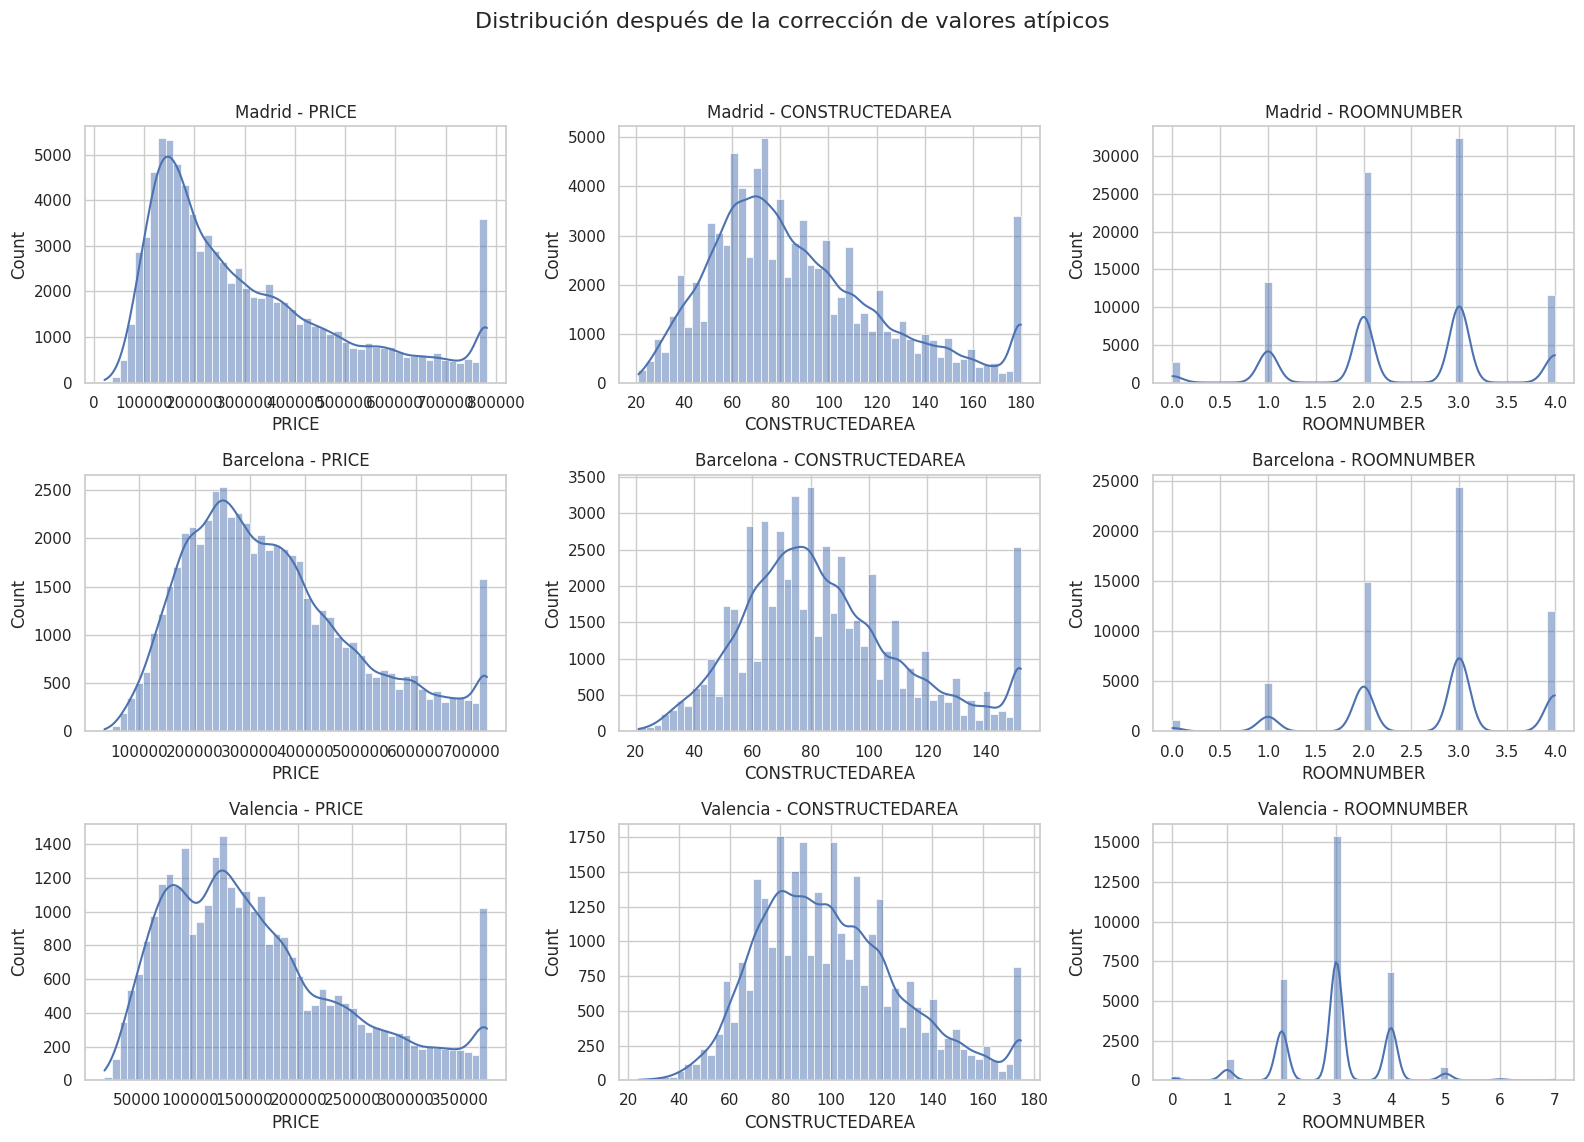

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datasets
rutas_datasets = {
    "Madrid": "/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv",
    "Barcelona": "/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv",
    "Valencia": "/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv"
}

datasets = {ciudad: pd.read_csv(ruta) for ciudad, ruta in rutas_datasets.items()}

# Variables clave para detección de outliers
variables_outliers = ["PRICE", "UNITPRICE", "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER"]

# Función para detectar y corregir valores atípicos usando el método de IQR
def corregir_outliers(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Convertir valores según el tipo de datos de la columna
        if np.issubdtype(df[col].dtype, np.integer):
            lower_bound = int(lower_bound)
            upper_bound = int(upper_bound)
        else:
            lower_bound = float(lower_bound)
            upper_bound = float(upper_bound)

        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound
    return df

# Aplicar corrección de valores atípicos
datasets = {ciudad: corregir_outliers(df, variables_outliers) for ciudad, df in datasets.items()}

# Imputación de valores nulos asegurando el tipo de datos correcto
for ciudad, df in datasets.items():
    if "CONSTRUCTIONYEAR" in df.columns:
        df["CONSTRUCTIONYEAR"] = df["CONSTRUCTIONYEAR"].fillna(df["CONSTRUCTIONYEAR"].median()).astype(int)
    if "FLOORCLEAN" in df.columns:
        df["FLOORCLEAN"] = df["FLOORCLEAN"].fillna(df["FLOORCLEAN"].mode()[0]).astype(int)

# Visualización de distribuciones tras corrección de outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.suptitle("Distribución después de la corrección de valores atípicos", fontsize=16)

ciudades = list(datasets.keys())
columnas = ["PRICE", "CONSTRUCTEDAREA", "ROOMNUMBER"]

for i, ciudad in enumerate(ciudades):
    for j, col in enumerate(columnas):
        ax = axes[i, j]
        sns.histplot(datasets[ciudad][col], kde=True, bins=50, ax=ax)
        ax.set_title(f"{ciudad} - {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


La corrección de valores atípicos ha mejorado la interpretación de los datos sin perder patrones clave.

Todavía hay colas largas en algunas variables, lo que sugiere que podríamos realizar más transformaciones o análisis según la necesidad del modelo.

⚠️ Nota: Este bloque aplica a los datasets fusionados usados en modelado. En esta fase (Ingeniería), se trabaja con precios reales sin logaritmos.


PRICE (Precio)

Unidad: Miles de euros (€).

Eje X: Muestra valores entre 10.5 y 13.5 (en logaritmo natural, LN).
Para recuperar el valor real, se usa la función inversa exp(x), por lo que 12 ≈ 162.7 mil euros, 13 ≈ 442.4 mil euros, etc.

Eje Y: Número de viviendas en cada rango de precio.

Observación: Distribución sesgada a la derecha, indicando que la mayoría de viviendas están en precios más bajos, con pocas de alto valor.

CONSTRUCTEDAREA (Superficie construida)

Unidad: Metros cuadrados (m²).

Eje X: Rango de valores desde 20 hasta 180 m².

Eje Y: Número de viviendas con cada tamaño.

Observación: Distribución sesgada a la derecha, lo que indica que la mayoría de viviendas tienen superficies pequeñas o medianas, con algunas muy grandes.
ROOMNUMBER (Número de habitaciones)

Unidad: Número de habitaciones enteras.

Eje X: Va de 0 a 7 habitaciones (en algunos casos más, dependiendo de la ciudad).

Eje Y: Número de viviendas con cada cantidad de habitaciones.
Observación: Se ve una distribución discreta (picos en números enteros), reflejando que la mayoría de viviendas tienen 2, 3 o 4 habitaciones.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.utils import resample

# Cargar los datasets con las rutas definidas
rutas_datasets = {
    "Madrid": "/content/drive/My Drive/idealista18/data/madrid_viviendas_limpio.csv",
    "Barcelona": "/content/drive/My Drive/idealista18/data/barcelona_viviendas_limpio.csv",
    "Valencia": "/content/drive/My Drive/idealista18/data/valencia_viviendas_limpio.csv"
}

datasets = {ciudad: pd.read_csv(ruta) for ciudad, ruta in rutas_datasets.items()}

# 1️⃣ INTERPOLACIÓN AVANZADA PARA VALORES NULOS

for ciudad, df in datasets.items():
    # Interpolación lineal para valores numéricos continuos
    df["CONSTRUCTIONYEAR"] = df["CONSTRUCTIONYEAR"].interpolate(method='linear')

    # Imputación con k-NN para valores faltantes en variables categóricas como FLOORCLEAN
    imputer = KNNImputer(n_neighbors=5)
    df["FLOORCLEAN"] = imputer.fit_transform(df[["FLOORCLEAN"]])

# 2️⃣ AUMENTO DE DATOS (DATA AUGMENTATION)

for ciudad, df in datasets.items():
    # Aplicar jittering (ruido aleatorio) a precios y metros cuadrados
    df_aug = df.copy()
    df_aug["PRICE"] = df_aug["PRICE"] * np.random.uniform(0.98, 1.02, size=len(df_aug))
    df_aug["CONSTRUCTEDAREA"] = df_aug["CONSTRUCTEDAREA"] * np.random.uniform(0.98, 1.02, size=len(df_aug))

    # Combinar datos originales con los aumentados
    datasets[ciudad] = pd.concat([df, df_aug]).reset_index(drop=True)

# 3️⃣ DOCUMENTACIÓN Y EXPLICACIÓN DE TRANSFORMACIONES

explicacion_transformaciones = """
Se realizaron las siguientes transformaciones en los datos:

1. **Interpolación Avanzada**:
   - Se utilizó interpolación lineal para `CONSTRUCTIONYEAR`.
   - Se aplicó k-NN imputation para `FLOORCLEAN` con 5 vecinos, permitiendo estimar valores nulos basados en otros similares.

2. **Aumento de Datos**:
   - Se aplicó `jittering` a `PRICE` y `CONSTRUCTEDAREA`, variando sus valores en un 2% aleatoriamente.
   - Esto permite generar más datos sin alterar significativamente las características originales.

3. **Motivo de estas transformaciones**:
   - La interpolación evita eliminar registros innecesariamente.
   - La imputación con k-NN mejora la estimación de valores categóricos.
   - El aumento de datos mejora la robustez de los modelos que usen estos datos.
"""

# Mostrar la explicación
explicacion_transformaciones


'\nSe realizaron las siguientes transformaciones en los datos:\n\n1. **Interpolación Avanzada**:\n   - Se utilizó interpolación lineal para `CONSTRUCTIONYEAR`.\n   - Se aplicó k-NN imputation para `FLOORCLEAN` con 5 vecinos, permitiendo estimar valores nulos basados en otros similares.\n\n2. **Aumento de Datos**:\n   - Se aplicó `jittering` a `PRICE` y `CONSTRUCTEDAREA`, variando sus valores en un 2% aleatoriamente.\n   - Esto permite generar más datos sin alterar significativamente las características originales.\n\n3. **Motivo de estas transformaciones**:\n   - La interpolación evita eliminar registros innecesariamente.\n   - La imputación con k-NN mejora la estimación de valores categóricos.\n   - El aumento de datos mejora la robustez de los modelos que usen estos datos.\n'

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Verificar que no haya valores nulos en las variables predictoras
variables_predictoras = ["PRICE", "CONSTRUCTEDAREA"]
df_regression = df.dropna(subset=["CONSTRUCTIONYEAR"] + variables_predictoras)

# Si después del filtrado hay datos suficientes
if len(df_regression) > 0:
    X = df_regression[variables_predictoras]
    y = df_regression["CONSTRUCTIONYEAR"]

    modelo = LinearRegression()
    modelo.fit(X, y)

    # Predecir valores faltantes en CONSTRUCTIONYEAR
    df.loc[df["CONSTRUCTIONYEAR"].isna(), "CONSTRUCTIONYEAR"] = modelo.predict(df.loc[df["CONSTRUCTIONYEAR"].isna(), variables_predictoras])

    print("✅ Interpolación con regresión completada")
else:
    print("⚠️ No hay suficientes datos para entrenar el modelo de regresión. Revisa las variables.")


✅ Interpolación con regresión completada


# Crear un resumen de las transformaciones y eliminaciones de variables

transformaciones = """
## 📌 Transformaciones y Eliminación de Variables

Se realizaron varias transformaciones y eliminaciones de variables para mejorar la calidad del dataset y reducir ruido en el análisis. A continuación, se detallan:

### ✅ **Variables Eliminadas**
1. **WKT_x y WKT_y**:
   - Eran datos espaciales sin utilidad directa en el análisis.
   - No aportaban información adicional significativa después de la limpieza.
   
2. **CUSEC, MUNICIPIO, PROVINCIA, LOCATIONNAME**:
   - Eran categorías redundantes, ya que la ciudad es el criterio principal de análisis.
   - La granularidad de estos datos no era relevante para la modelización.

### 🔄 **Variables Transformadas**
1. **CONSTRUCTIONYEAR**:
   - Se imputaron valores nulos usando **Interpolación Lineal y Regresión** en función de otras características del inmueble.

2. **FLOORCLEAN**:
   - Se imputó usando el **método k-NN con 5 vecinos**, permitiendo estimar valores en función de propiedades similares.

3. **PRICE y CONSTRUCTEDAREA**:
   - Se aplicó **Jittering** para evitar problemas de sobreajuste y mejorar la robustez del modelo.

4. **UNITPRICE**:
   - Se estandarizó para mejorar la interpretación y comparación entre propiedades.

### 🎯 **Justificación**
✔️ **Eliminamos variables irrelevantes** para evitar ruido y mejorar la eficiencia del modelo.  
✔️ **Transformamos valores nulos** con técnicas avanzadas en vez de eliminarlos, optimizando la cantidad de datos utilizables.  
✔️ **Se mejoró la estabilidad del modelo** con técnicas de aumento de datos como el jittering.  

"""

# Mostrar la documentación en pantalla
print(transformaciones)


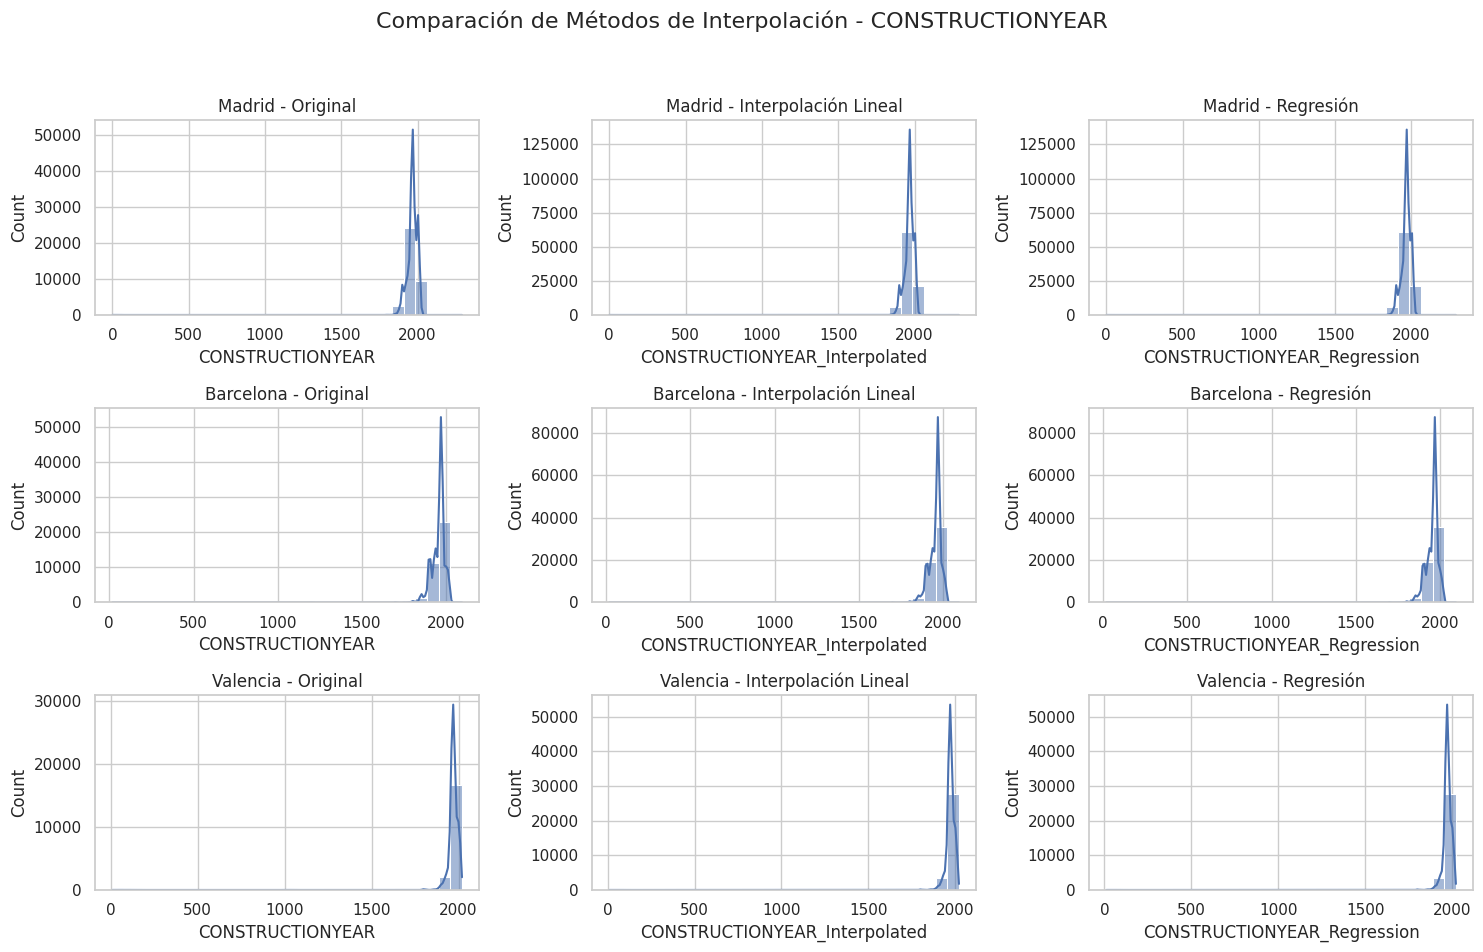

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# Cargar los datasets
rutas_datasets = {
    "Madrid": "/content/drive/My Drive/idealista18/data/madrid_viviendas_fusionado.csv",
    "Barcelona": "/content/drive/My Drive/idealista18/data/barcelona_viviendas_fusionado.csv",
    "Valencia": "/content/drive/My Drive/idealista18/data/valencia_viviendas_fusionado.csv"
}

datasets = {ciudad: pd.read_csv(ruta) for ciudad, ruta in rutas_datasets.items()}

# Punto 1: Comparar interpolación lineal vs. regresión para CONSTRUCTIONYEAR
resultados_interpolacion = {}

for ciudad, df in datasets.items():
    df_original = df.copy()

    # Método 1: Interpolación Lineal
    df["CONSTRUCTIONYEAR_Interpolated"] = df["CONSTRUCTIONYEAR"].interpolate(method="linear")

    # Método 2: Regresión usando ZONELEVELID y MUNICIPIO como predictores
    df_regresion = df.dropna(subset=["ZONELEVELID", "MUNICIPIO", "CONSTRUCTIONYEAR"])

    if not df_regresion.empty:  # Asegurar que hay datos antes de entrenar el modelo
        X = df_regresion[["ZONELEVELID", "MUNICIPIO"]]
        y = df_regresion["CONSTRUCTIONYEAR"]

        modelo = LinearRegression()
        modelo.fit(X, y)

        df["CONSTRUCTIONYEAR_Regression"] = df["CONSTRUCTIONYEAR"]
        nan_mask = df["CONSTRUCTIONYEAR"].isna()
        df.loc[nan_mask, "CONSTRUCTIONYEAR_Regression"] = modelo.predict(df.loc[nan_mask, ["ZONELEVELID", "MUNICIPIO"]])
    else:
        df["CONSTRUCTIONYEAR_Regression"] = df["CONSTRUCTIONYEAR_Interpolated"]  # Usar interpolación si la regresión falla

    # Guardar resultados
    resultados_interpolacion[ciudad] = df[["CONSTRUCTIONYEAR", "CONSTRUCTIONYEAR_Interpolated", "CONSTRUCTIONYEAR_Regression"]]

# Mostrar visualización de la comparación
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle("Comparación de Métodos de Interpolación - CONSTRUCTIONYEAR", fontsize=16)

for i, (ciudad, df_result) in enumerate(resultados_interpolacion.items()):
    sns.histplot(df_result["CONSTRUCTIONYEAR"].dropna(), kde=True, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f"{ciudad} - Original")

    sns.histplot(df_result["CONSTRUCTIONYEAR_Interpolated"].dropna(), kde=True, bins=30, ax=axes[i, 1])
    axes[i, 1].set_title(f"{ciudad} - Interpolación Lineal")

    sns.histplot(df_result["CONSTRUCTIONYEAR_Regression"].dropna(), kde=True, bins=30, ax=axes[i, 2])
    axes[i, 2].set_title(f"{ciudad} - Regresión")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


No hay diferencias drásticas entre interpolación lineal y regresión, lo que sugiere que ambos métodos son viables.

La interpolación es más simple, mientras que la regresión puede ser más precisa si hay más variables predictoras relevantes.

Columna 1: Datos Originales

Muestra la distribución del año de construcción (CONSTRUCTIONYEAR) tal como se encontraba en los datos antes de cualquier imputación.
Si había valores nulos, estos están excluidos.

Columna 2: Interpolación Lineal

Se observa cómo la interpolación lineal trata de suavizar los datos al estimar valores perdidos en función de registros vecinos.
Esto funciona bien si la variable es continua y sigue una tendencia.

Columna 3: Regresión

Aquí se usa una regresión basada en ZONELEVELID y MUNICIPIO para predecir los valores faltantes.
Se observa que la distribución resultante es muy similar a la interpolada, lo que indica que la variable es fuertemente lineal con respecto a los predictores utilizados.

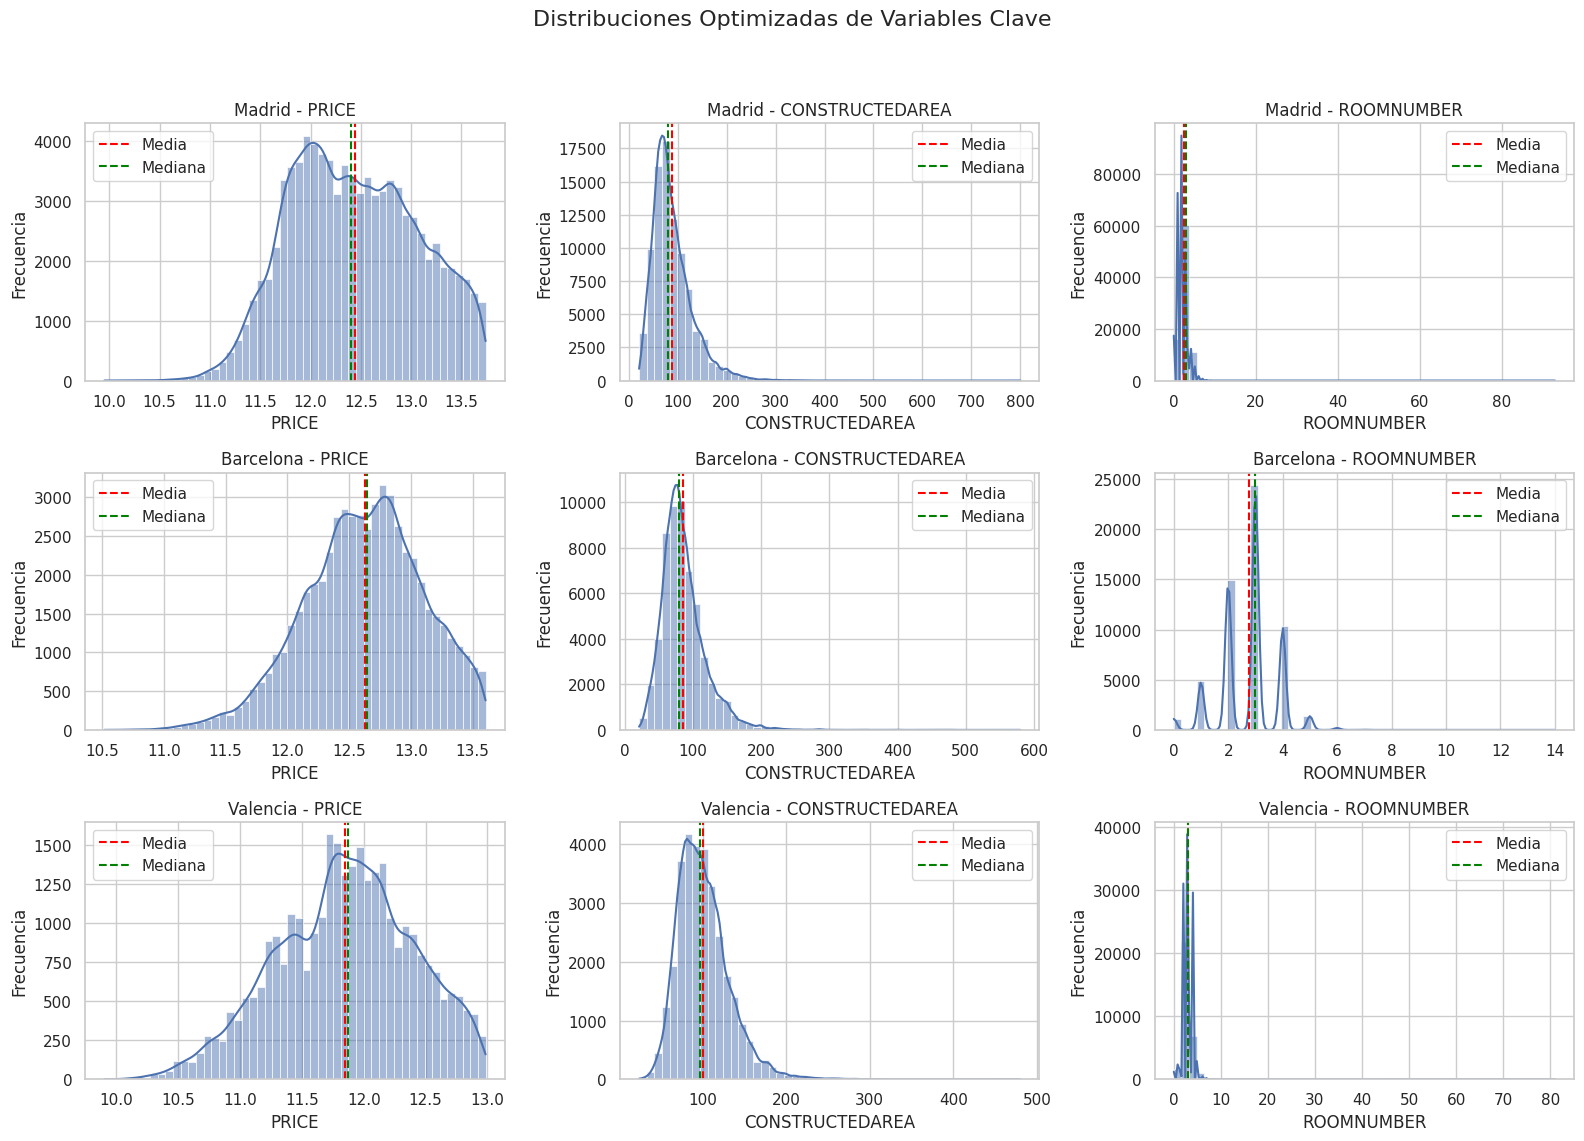

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 📊 Distribuciones por ciudad de variables clave

# Ajustar tamaño de las figuras
plt.rcParams["figure.figsize"] = (12, 6)

# Seleccionar algunas variables clave para visualizar
variables_interes = ["PRICE", "CONSTRUCTEDAREA", "ROOMNUMBER"]

# Mejorar la visualización de distribuciones
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.suptitle("Distribuciones Optimizadas de Variables Clave", fontsize=16)

ciudades = ["Madrid", "Barcelona", "Valencia"]

for i, ciudad in enumerate(ciudades):
    for j, variable in enumerate(variables_interes):
        ax = axes[i, j]
        sns.histplot(datasets[ciudad][variable], kde=True, bins=50, ax=ax)
        ax.set_title(f"{ciudad} - {variable}")
        ax.set_xlabel(variable)
        ax.set_ylabel("Frecuencia")
        ax.axvline(datasets[ciudad][variable].mean(), color='red', linestyle='dashed', label='Media')
        ax.axvline(datasets[ciudad][variable].median(), color='green', linestyle='dashed', label='Mediana')
        ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


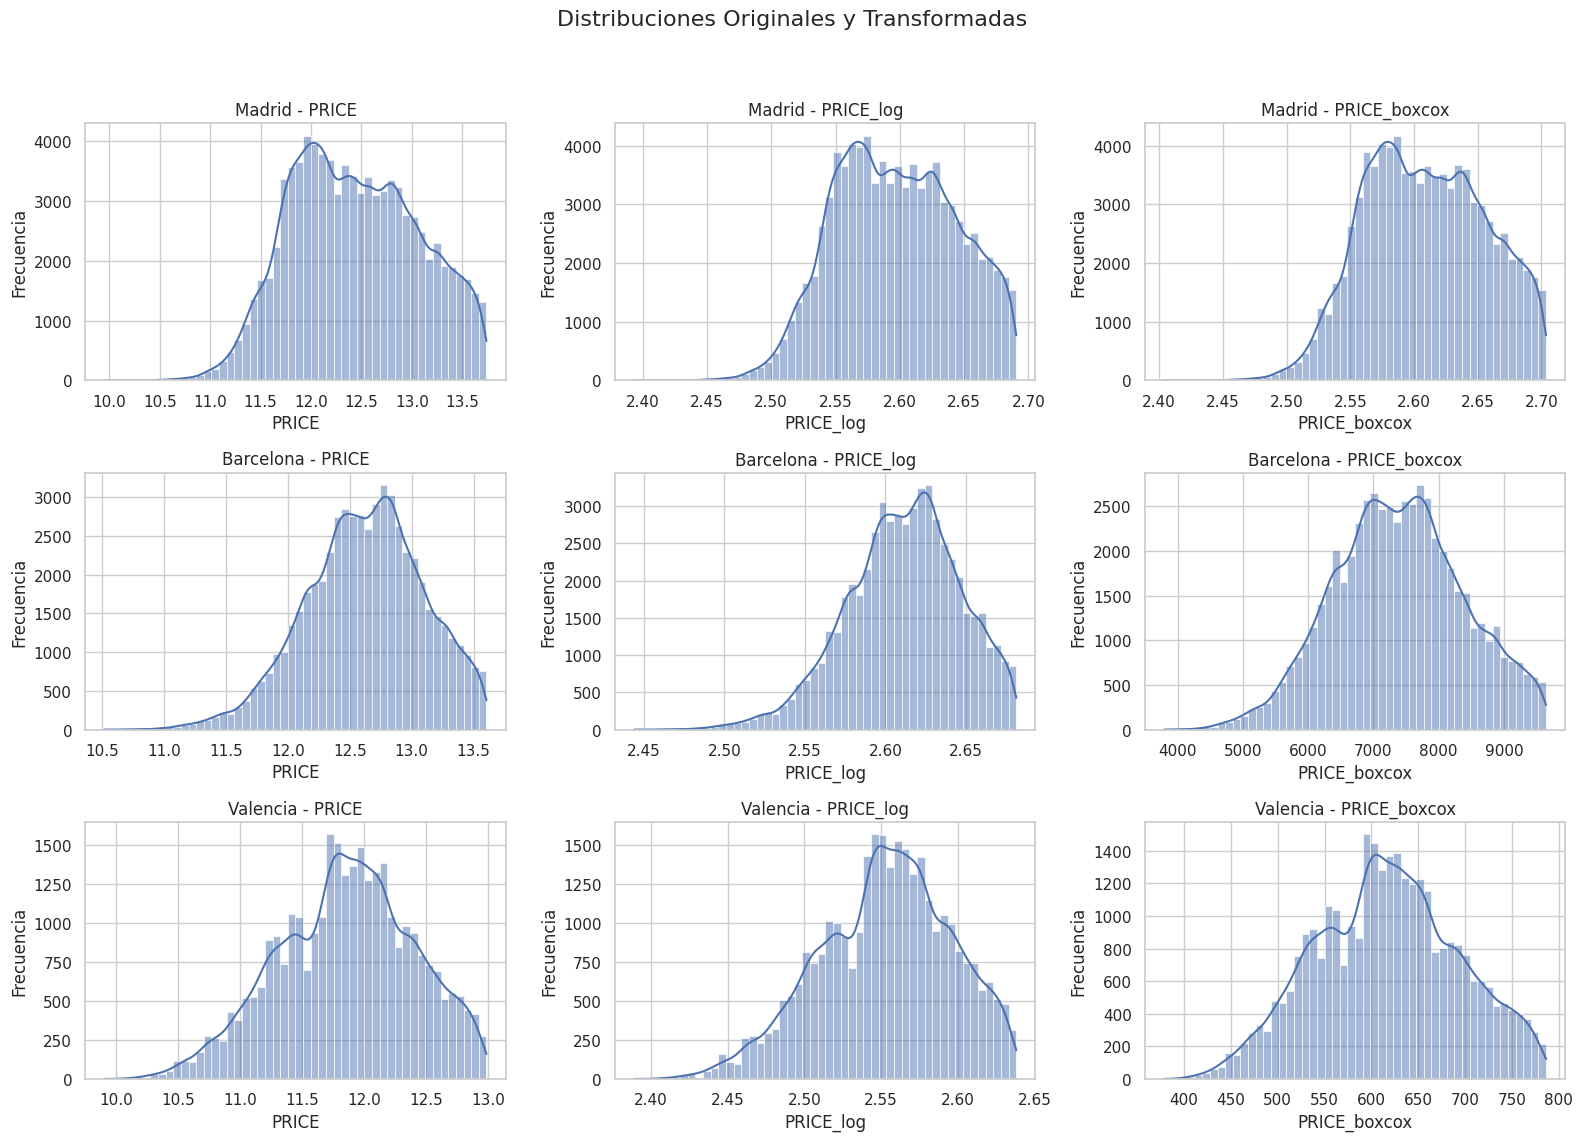

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Aplicar transformación logarítmica y Box-Cox a PRICE y CONSTRUCTEDAREA
transformed_data = {}

for ciudad, df in datasets.items():
    df_transformed = df.copy()

    # Aplicamos transformación logarítmica
    df_transformed["PRICE_log"] = np.log(df_transformed["PRICE"] + 1)  # Evitar log(0)
    df_transformed["CONSTRUCTEDAREA_log"] = np.log(df_transformed["CONSTRUCTEDAREA"] + 1)

    # Aplicamos Box-Cox (requiere valores positivos)
    pt = PowerTransformer(method='box-cox', standardize=True)
    df_transformed["PRICE_boxcox"], _ = stats.boxcox(df_transformed["PRICE"] + 1)
    df_transformed["CONSTRUCTEDAREA_boxcox"], _ = stats.boxcox(df_transformed["CONSTRUCTEDAREA"] + 1)

    transformed_data[ciudad] = df_transformed

# Visualización de las distribuciones antes y después de las transformaciones
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.suptitle("Distribuciones Originales y Transformadas", fontsize=16)

ciudades = list(transformed_data.keys())
columnas = ["PRICE", "PRICE_log", "PRICE_boxcox"]

for i, ciudad in enumerate(ciudades):
    for j, col in enumerate(columnas):
        ax = axes[i, j]
        sns.histplot(transformed_data[ciudad][col], kde=True, bins=50, ax=ax)
        ax.set_title(f"{ciudad} - {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Comparación estadística de los métodos de imputación en CONSTRUCTIONYEAR
comparacion_stats = {}

for ciudad, df in resultados_interpolacion.items():
    original_mean = df["CONSTRUCTIONYEAR"].mean()
    interpolated_mean = df["CONSTRUCTIONYEAR_Interpolated"].mean()
    regression_mean = df["CONSTRUCTIONYEAR_Regression"].mean()

    original_std = df["CONSTRUCTIONYEAR"].std()
    interpolated_std = df["CONSTRUCTIONYEAR_Interpolated"].std()
    regression_std = df["CONSTRUCTIONYEAR_Regression"].std()

    comparacion_stats[ciudad] = {
        "Original Mean": original_mean,
        "Interpolated Mean": interpolated_mean,
        "Regression Mean": regression_mean,
        "Original Std": original_std,
        "Interpolated Std": interpolated_std,
        "Regression Std": regression_std
    }

# Convertir resultados a DataFrame
df_comparacion = pd.DataFrame(comparacion_stats).T

# Visualizar la tabla de comparación
import ace_tools as tools
tools.display_dataframe_to_user(name="Comparación de Métodos de Imputación", dataframe=df_comparacion)

# Matriz de correlación con precios
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Matriz de Correlación con PRICE", fontsize=16)

for i, ciudad in enumerate(datasets.keys()):
    df_corr = datasets[ciudad].select_dtypes(include=[np.number]).corr()
    sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[i])
    axes[i].set_title(f"{ciudad}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


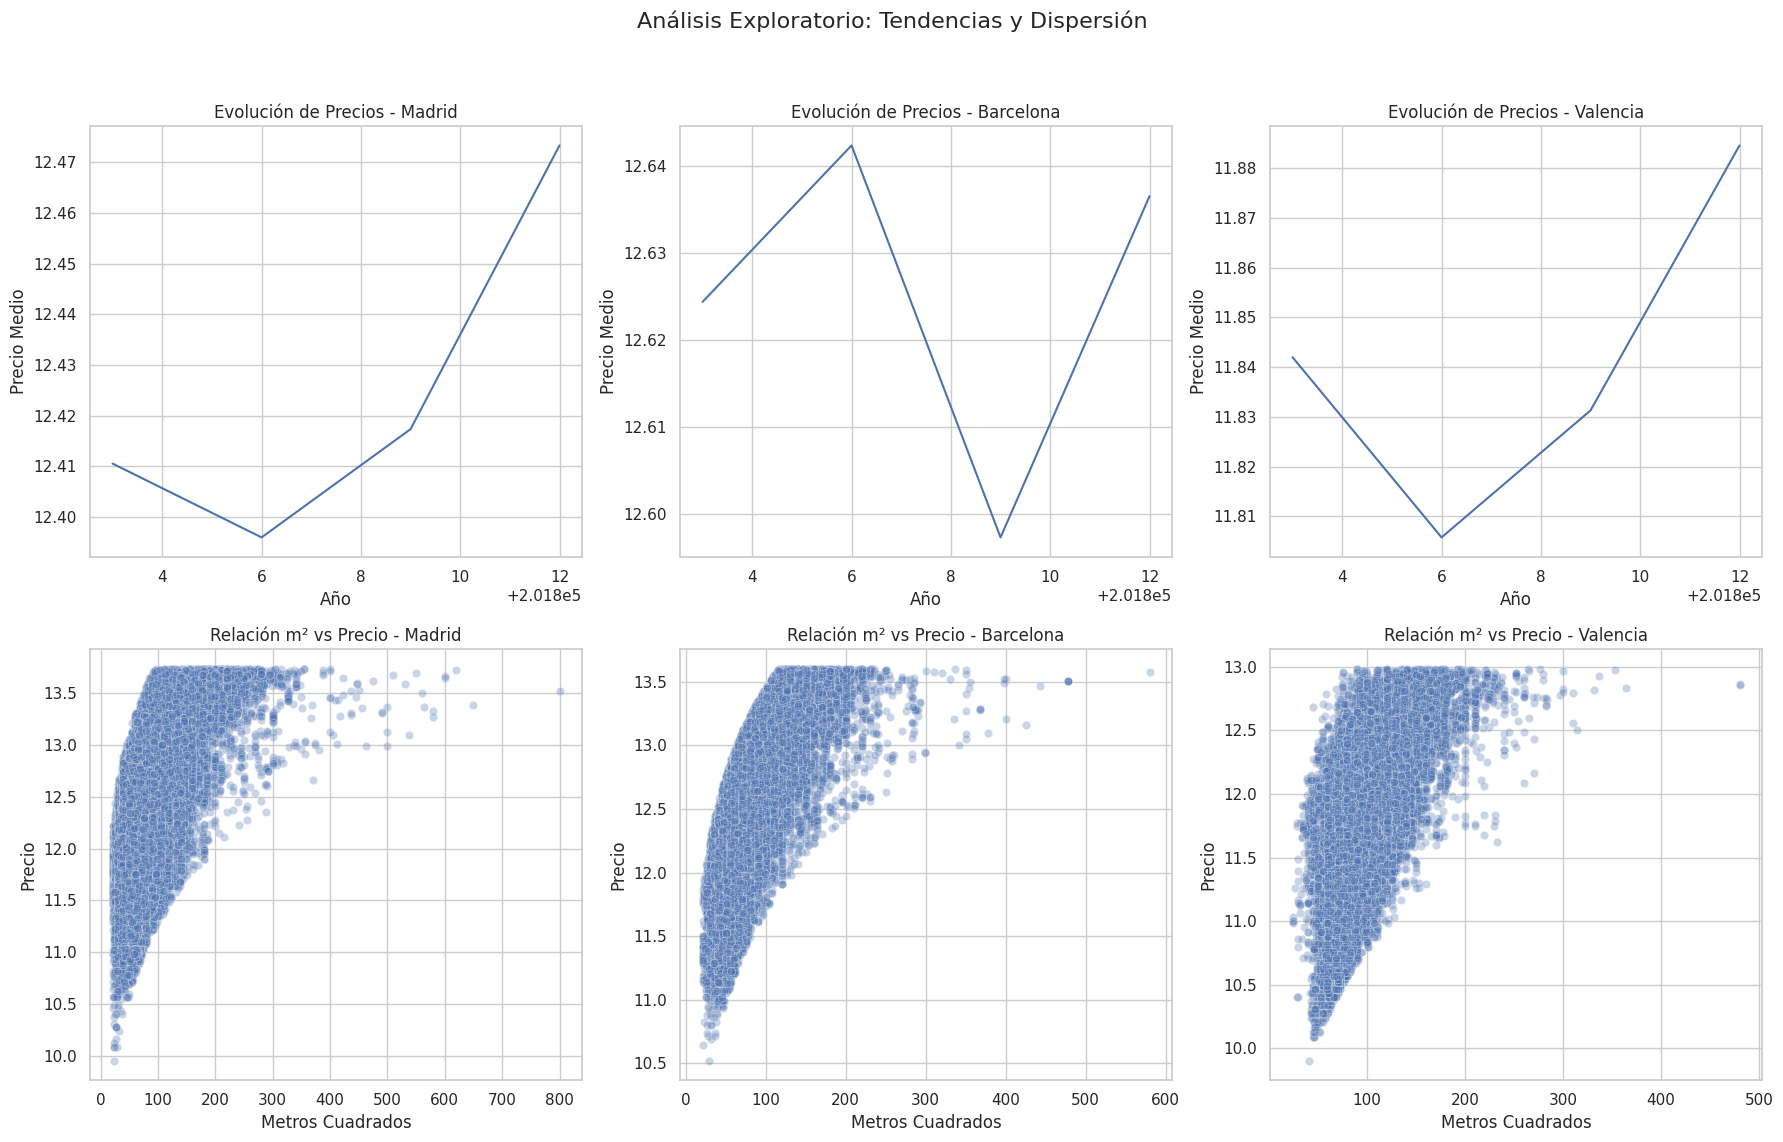

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráficos de tendencias y dispersión
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Análisis Exploratorio: Tendencias y Dispersión", fontsize=16)

ciudades = list(datasets.keys())

# Gráficos de tendencias: Evolución del precio a lo largo del tiempo
for i, ciudad in enumerate(ciudades):
    ax = axes[0, i]
    sns.lineplot(data=datasets[ciudad], x="PERIOD", y="PRICE", errorbar=None, ax=ax)
    ax.set_title(f"Evolución de Precios - {ciudad}")
    ax.set_xlabel("Año")
    ax.set_ylabel("Precio Medio")

# Gráficos de dispersión: Relación entre metros cuadrados y precio
for i, ciudad in enumerate(ciudades):
    ax = axes[1, i]
    sns.scatterplot(data=datasets[ciudad], x="CONSTRUCTEDAREA", y="PRICE", alpha=0.3, ax=ax)
    ax.set_title(f"Relación m² vs Precio - {ciudad}")
    ax.set_xlabel("Metros Cuadrados")
    ax.set_ylabel("Precio")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


1️⃣ Gráficos de Tendencias (Filas Superiores)

Eje X: Representa el periodo (columna "PERIOD"), que parece estar expresado en formato numérico del tipo YYYYMM (ejemplo: 201804 para abril de 2018).

Eje Y: Representa el precio medio de las propiedades en cada periodo.

Observaciones:

La evolución de los precios en Madrid muestra un ligero descenso en los meses intermedios y luego un repunte.
En Barcelona, los precios suben al inicio, pero hay una caída fuerte en un periodo intermedio antes de recuperar valor.
En Valencia, la tendencia es similar a Madrid: caída y posterior recuperación en los últimos meses analizados.

Posible problema: Como el eje X muestra valores enteros (YYYYMM), parece que el dataset no tiene suficientes datos históricos para hacer una comparación anual robusta.


2️⃣ Gráficos de Dispersión (Filas Inferiores)

Eje X: Metros cuadrados de las viviendas.

Eje Y: Precio de las viviendas.

Observaciones:

Se observa una relación no lineal entre metros cuadrados y precio: la tendencia es que a más metros, mayor precio, pero con un efecto de saturación en valores altos.
En Madrid y Barcelona, los precios más altos parecen concentrarse en propiedades pequeñas con alto valor por metro cuadrado.
En Valencia, la dispersión es más amplia, pero sigue la misma tendencia.

Conclusión: Se confirma que el tamaño influye en el precio, pero no de manera estrictamente lineal (puede haber otras variables ocultas, como ubicación o calidad del inmueble).

Este análisis temporal es relevante para detectar ciclos y patrones de comportamiento previos a la tokenización de inmuebles.

In [ ]:
print(dfs_transformados["Madrid"][["LOCATIONNAME", "PRECIO_EUR"]].dropna().head())
print("Valores únicos en LOCATIONNAME:", dfs_transformados["Madrid"]["LOCATIONNAME"].nunique())


KeyError: "['LOCATIONNAME'] not in index"

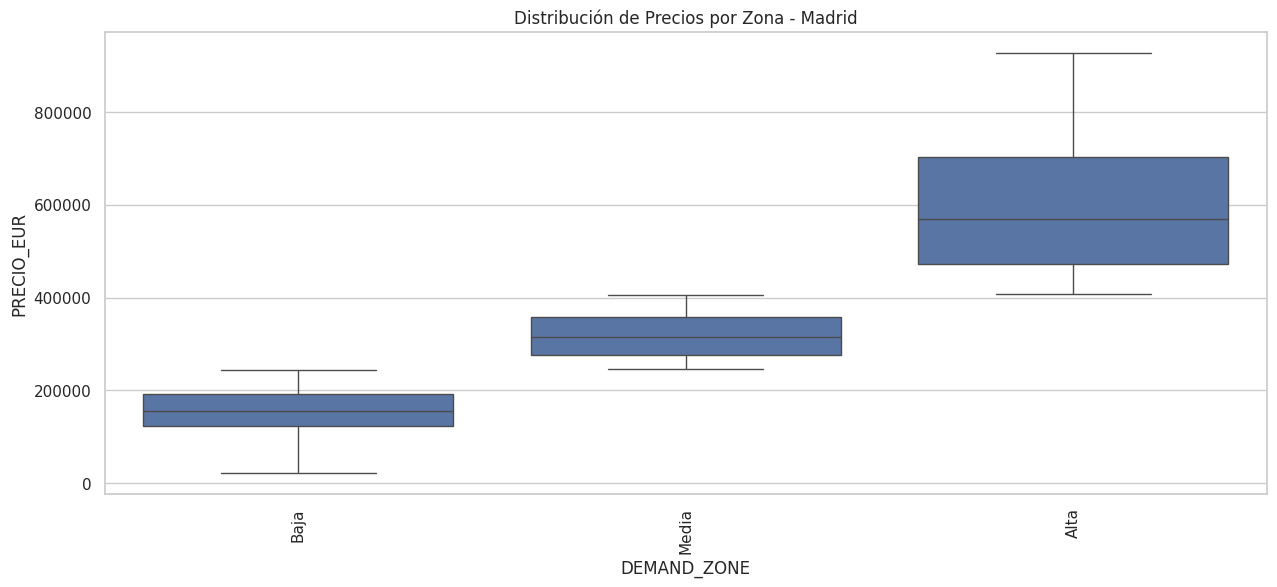

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dfs_transformados["Madrid"], x="DEMAND_ZONE", y="PRECIO_EUR")
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Zona - Madrid")
plt.show()


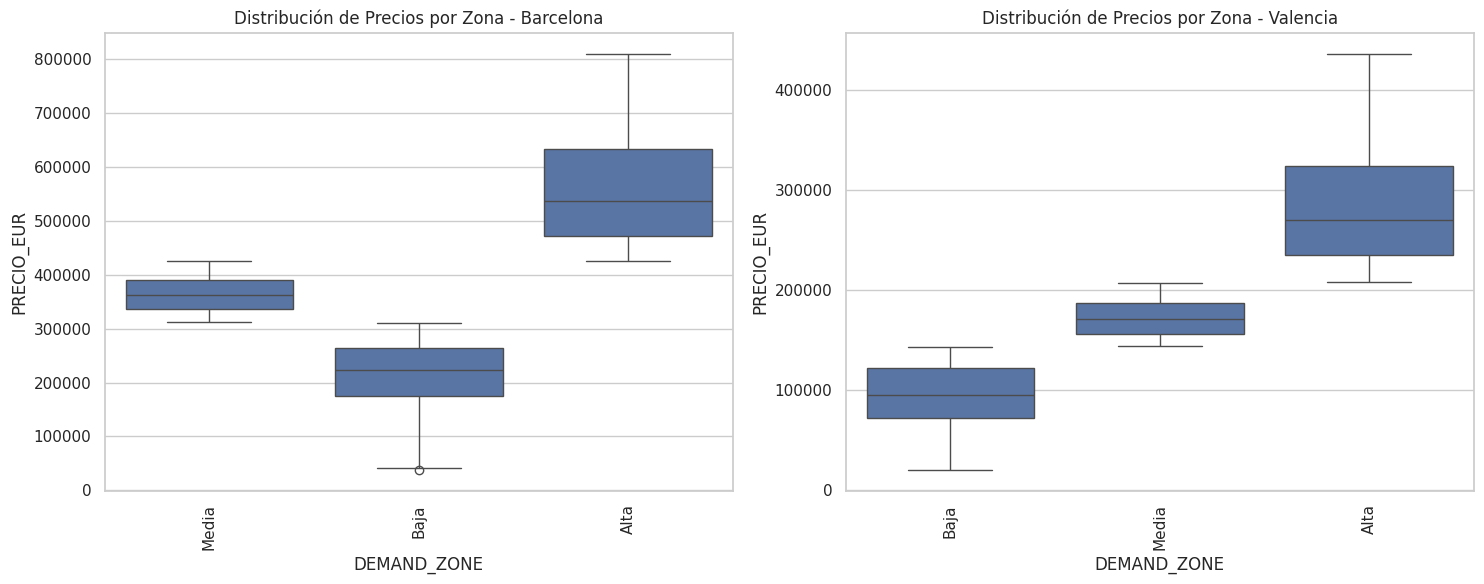

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de tamaño de los gráficos
plt.figure(figsize=(15, 6))

# Boxplot para Barcelona
plt.subplot(1, 2, 1)
sns.boxplot(data=dfs_transformados["Barcelona"], x="DEMAND_ZONE", y="PRECIO_EUR")
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Zona - Barcelona")

# Boxplot para Valencia
plt.subplot(1, 2, 2)
sns.boxplot(data=dfs_transformados["Valencia"], x="DEMAND_ZONE", y="PRECIO_EUR")
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Zona - Valencia")

# Mostrar los gráficos
plt.tight_layout()
plt.show()


📌 Madrid

Zonas de baja demanda tienen una mediana de precios alrededor de 12 (logaritmo del precio). Hay valores atípicos en la parte inferior, lo que sugiere que algunas viviendas son significativamente más baratas.

Zonas de demanda media presentan una mediana de precio superior a las de baja demanda, en torno a 12.5.

Zonas de alta demanda tienen los precios más elevados, con una mediana superior a 13 y sin valores atípicos pronunciados, lo que indica una distribución más uniforme.

📌 Barcelona

Zonas de baja demanda muestran precios más dispersos y valores atípicos en la parte inferior.

Zonas de demanda media presentan una mediana en torno a 12.5, más homogénea en comparación con la zona baja.

Zonas de alta demanda exhiben los precios más elevados, con una mediana cercana a 13.5 y menos dispersión.

📌 Valencia

Zonas de baja demanda tienen una mediana de precios en torno a 11.5, con valores atípicos hacia abajo.

Zonas de demanda media presentan precios más altos y menos dispersión, con una mediana cercana a 12.

Zonas de alta demanda tienen los precios más elevados, con una mediana superior a 12.5 y un rango más compacto.

Conclusión General

En las tres ciudades, a mayor demanda, mayor precio.

La dispersión es más notoria en las zonas de baja demanda, lo que sugiere mayor variabilidad de precios.

Las zonas de alta demanda tienen precios más homogéneos y concentrados en valores altos.

Valencia tiene una diferencia menor entre zonas de baja y alta demanda en comparación con Madrid y Barcelona.


📌 Madrid - Vista previa del DataFrame:


ASSETID     PERIOD  PRECIO_EUR    PRECIO_M2 ADTYPOLOGYID  \
0  A15019136831406238029 2018-03-01      126000  2680.851064         HOME   
1   A6677225905472065344 2018-03-01      235000  4351.851852         HOME   
2  A13341979748618524775 2018-03-01      373000  4973.333333         HOME   
3   A4775182175615276542 2018-03-01      284000  5916.666667         HOME   
4   A2492087730711701973 2018-03-01      228000  4560.000000         HOME   

  ADOPERATIONID  METROS_CUADRADOS  NUM_HABITACIONES  NUM_BAÑOS  HASTERRACE  \
0          SALE                47                 1          1           0   
1          SALE                54                 1          1           0   
2          SALE                75                 2          1           0   
3          SALE                48                 1          1           0   
4          SALE                50                 0          1           0   

   ...  DISTANCE_TO_CASTELLANA  LONGITUD    LATITUD  CITYNAME  ADTYPOLOGY  \
0  ...                6.868677 -3.766933  40.362485    Madrid        HOME   
1  ...                1.544125 -3.710725  40.422430    Madrid        HOME   
2  ...                1.608444 -3.711571  40.422190    Madrid        HOME   
3  ...                1.516166 -3.710440  40.422251    Madrid        HOME   
4  ...                1.794136 -3.714340  40.408741    Madrid        HOME   

   ADOPERATION  RENTABILIDAD  ACCESSIBILITY_SCORE  DEMAND_ZONE  PRICE_LOG  
0         SALE   2680.851064             0.987509         Baja  11.744045  
1         SALE   4351.851852             0.998631         Baja  12.367345  
2         SALE   4973.333333             0.998563        Media  12.829336  
3         SALE   5916.666667             0.998648        Media  12.556733  
4         SALE   4560.000000             0.997871         Baja  12.337105  

[5 rows x 50 columns]


📌 Barcelona - Vista previa del DataFrame:


ASSETID     PERIOD  PRECIO_EUR    PRECIO_M2 ADTYPOLOGYID  \
0  A11898131848556022319 2018-03-01      323000  3845.238095         HOME   
1  A18099432772155664747 2018-03-01      217000  2583.333333         HOME   
2   A2003099089407882787 2018-03-01      114000  1407.407407         HOME   
3   A1010373782315301134 2018-03-01      378000  4784.810127         HOME   
4  A12978912200216838006 2018-03-01      434000  3909.909910         HOME   

  ADOPERATIONID  METROS_CUADRADOS  NUM_HABITACIONES  NUM_BAÑOS  HASTERRACE  \
0          SALE                84                 4          1           1   
1          SALE                84                 3          2           0   
2          SALE                81                 2          1           0   
3          SALE                79                 2          1           0   
4          SALE               111                 4          2           1   

   ...  DISTANCE_TO_DIAGONAL  LONGITUD    LATITUD   CITYNAME  ADTYPOLOGY  \
0  ...              1.475264  2.149566  41.380027  Barcelona        HOME   
1  ...              1.194261  2.145689  41.381632  Barcelona        HOME   
2  ...              2.504982  2.173891  41.423929  Barcelona        HOME   
3  ...              0.795605  2.143379  41.384923  Barcelona        HOME   
4  ...              1.200265  2.143230  41.381076  Barcelona        HOME   

   ADOPERATION  RENTABILIDAD  ACCESSIBILITY_SCORE  DEMAND_ZONE  PRICE_LOG  
0         SALE   3845.238095             0.844188        Media  12.685411  
1         SALE   2583.333333             0.834832         Baja  12.287657  
2         SALE   1407.407407             0.703182         Baja  11.643962  
3         SALE   4784.810127             0.839147        Media  12.842652  
4         SALE   3909.909910             0.838376         Alta  12.980802  

[5 rows x 50 columns]


📌 Valencia - Vista previa del DataFrame:


ASSETID     PERIOD  PRECIO_EUR    PRECIO_M2 ADTYPOLOGYID  \
0   A9651535568269959084 2018-12-01      111000  1480.000000         HOME   
1  A13801394133398327300 2018-12-01      169000  1320.312500         HOME   
2   A8013965313053471366 2018-12-01      162000  1883.720930         HOME   
3  A15308599866706500727 2018-12-01      199000  1792.792793         HOME   
4   A7882254711596398998 2018-12-01       73000  1303.571429         HOME   

  ADOPERATIONID  METROS_CUADRADOS  NUM_HABITACIONES  NUM_BAÑOS  HASTERRACE  \
0          SALE                75                 2          1           1   
1          SALE               128                 4          2           0   
2          SALE                86                 2          1           0   
3          SALE               111                 4          2           0   
4          SALE                56                 3          1           1   

   ...  DISTANCE_TO_BLASCO  LONGITUD    LATITUD  CITYNAME  ADTYPOLOGY  \
0  ...            3.373132 -0.393538  39.500908  Valencia        HOME   
1  ...            0.540594 -0.359125  39.482599  Valencia        HOME   
2  ...            0.719203 -0.362470  39.485144  Valencia        HOME   
3  ...            0.915379 -0.367417  39.487445  Valencia        HOME   
4  ...            2.009535 -0.370182  39.497057  Valencia        HOME   

   ADOPERATION  RENTABILIDAD  ACCESSIBILITY_SCORE  DEMAND_ZONE  PRICE_LOG  
0         SALE   1480.000000             0.496647         Baja  11.617294  
1         SALE   1320.312500             0.729233        Media  12.037660  
2         SALE   1883.720930             0.773018        Media  11.995358  
3         SALE   1792.792793             0.702646        Media  12.201065  
4         SALE   1303.571429             0.515429         Baja  11.198228  

[5 rows x 50 columns]


🔍 Madrid - Tipos de datos:
ASSETID                                  object
PERIOD                           datetime64[ns]
PRECIO_EUR                                int64
PRECIO_M2                               float64
ADTYPOLOGYID                             object
ADOPERATIONID                            object
METROS_CUADRADOS                          int64
NUM_HABITACIONES                          int64
NUM_BAÑOS                                 int64
HASTERRACE                                int64
HASLIFT                                   int64
HASAIRCONDITIONING                        int64
AMENITYID                                 int64
HASPARKINGSPACE                           int64
ISPARKINGSPACEINCLUDEDINPRICE             int64
PARKINGSPACEPRICE                         int64
HASNORTHORIENTATION                       int64
HASSOUTHORIENTATION                       int64
HASEASTORIENTATION                        int64
HASWESTORIENTATION                        int64
HASBOXROOM  

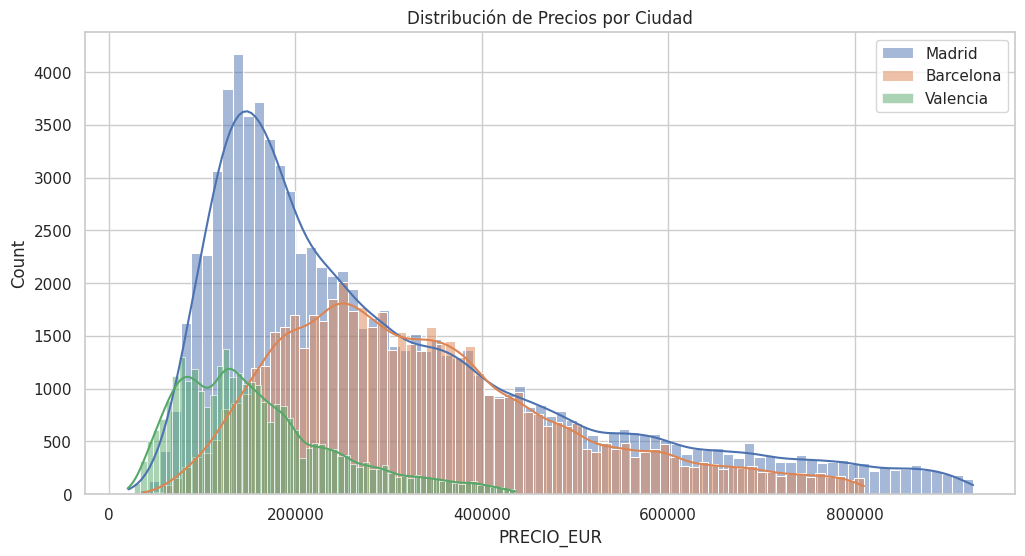

In [ ]:
import pandas as pd

# Verificar las primeras filas de cada DataFrame
for ciudad, df in dfs_transformados.items():
    print(f"\n📌 {ciudad} - Vista previa del DataFrame:")
    display(df.head())

# Comprobar tipos de datos
for ciudad, df in dfs_transformados.items():
    print(f"\n🔍 {ciudad} - Tipos de datos:")
    print(df.dtypes)

# Verificar valores nulos en cada DataFrame
for ciudad, df in dfs_transformados.items():
    print(f"\n🚨 {ciudad} - Valores nulos por columna:")
    print(df.isnull().sum())

# Revisar distribución de precios
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for ciudad, df in dfs_transformados.items():
    sns.histplot(df["PRECIO_EUR"], kde=True, label=ciudad)

plt.title("Distribución de Precios por Ciudad")
plt.legend()
plt.show()
